# Table of Contents

* [Import Packages](#Packages)
* [Import Brain and cluster for 6mo wt](#Brain_6mowt)
* [Import Brain and cluster for 12mo wt](#Brain_12mowt)
* [Import Brain and cluster for 22mo wt](#Brain_22mowt)
* [Import Brain and cluster for 6mo tg](#Brain_6motg)
* [Import Brain and cluster for 12mo tg](#Brain_12motg)
* [Import Brain and cluster for 22mo tg](#Brain_22motg)

<a class="anchor" id="Packages"></a>

In [1]:
import scipy
# numpy
import numpy
# matplotlib
import matplotlib
# pandas
import pandas
# scikit-learn
import sklearn
from sklearn import metrics

from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
import pandas as pd
import seaborn as sns
import numpy as np
# Load libraries
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from numpy import loadtxt
#from xgboost import XGBClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from itertools import cycle
from sklearn.impute import SimpleImputer
from numpy import mean
from numpy import std
from sklearn.metrics import auc
from sklearn.metrics import make_scorer
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap.umap_ as umap
import statsmodels.api as sm
import random
from scipy.stats import shapiro
from scipy.stats import levene
from scipy.stats import bartlett
from scipy.stats import ttest_ind
import matplotlib.colors as mcolors


# clustering packages 
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import normalize
from kneed import KneeLocator
from sklearn.cluster import KMeans

# Packages for importing data
import glob
import time

# Packages needed for defining which file should be added to which dictionary using regex
import re

# Package needed for labeling points in graph
from adjustText import adjust_text

# Packages for image segmentation 
import ipywidgets as widgets
import urllib
import matplotlib.cbook as cbook
from mpl_interactions import image_segmenter
import PIL

Below we import our filtered ion list.

In [2]:
significant_anova_ion_whole_brain = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/two_sd_filtered_ions_no_noise.csv')
len(significant_anova_ion_whole_brain)

364

<a class="anchor" id="Brain_6mowt"></a>
Below we import a brain for the 6 month wild type.

In [3]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
masked_metabolomics_matrix_225_a1wt = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/225_a1wt_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_225_a1wt = pd.read_csv('D:/NEW All AGE Negative TL/AL080521_225_a1wt_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [4]:
filtered_ions_matrix = masked_metabolomics_matrix_225_a1wt[significant_anova_ion_whole_brain['0'].tolist()]
filtered_ions_matrix_no_background = filtered_ions_matrix.loc[(filtered_ions_matrix.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

2592    2593    2594    2595    2596    2597    2598    2599   \
790.5429   528.0  1106.0  1582.0  1574.0  1100.0  1517.0   568.0   206.0   
700.5101     0.0     0.0   121.0     0.0    39.0     0.0    20.0     0.0   
331.2639   629.0   501.0   629.0   775.0   339.0   398.0   113.0    80.0   
283.2645  2290.0  2507.0  3216.0  3424.0  2132.0  3029.0  2288.0  1702.0   
892.6272    44.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
727.5385     0.0    39.0    70.0     0.0     0.0    27.0    29.0     0.0   
754.5710     0.0     0.0    34.0    26.0     0.0   198.0     0.0     0.0   
749.4791   131.0    29.0    68.0    19.0    60.0    56.0    53.0     0.0   
725.5073     0.0    45.0    32.0    79.0     0.0     0.0    41.0     0.0   
878.6012     0.0     0.0    35.0     0.0    34.0     0.0     0.0    22.0   

           2600    2613   ...   18224   18225   18243   18244   18245   18246  \
790.5429   154.0    46.0  ...  2621.0   969.0  2234.0  2895.0  2748.0  2447.0   
700.5101     0.0    38.0  ...   190.0     0.0   163.0   283.0    80.0    96.0   
331.2639     0.0    50.0  ...  1297.0    43.0  1025.0   798.0  1013.0  1459.0   
283.2645  1041.0  2829.0  ...  7558.0  2582.0  6237.0  4198.0  5155.0  4035.0   
892.6272     0.0     0.0  ...    78.0    38.0   130.0     5.0   142.0    57.0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
727.5385     0.0     0.0  ...   182.0    58.0    69.0    41.0   244.0   202.0   
754.5710     0.0     0.0  ...   255.0    21.0   218.0   210.0    31.0   140.0   
749.4791     0.0     0.0  ...   158.0   285.0   360.0   198.0   282.0   187.0   
725.5073     0.0     0.0  ...   185.0   127.0   108.0   128.0    21.0   196.0   
878.6012     0.0     0.0  ...    45.0    37.0    22.0   155.0    16.0    78.0   

           18247   18248   18249   18250  
790.5429  1774.0  1748.0  7176.0  1606.0  
700.5101   329.0   241.0   257.0   245.0  
331.2639   768.0   910.0  1455.0   205.0  
283.2645  2938.0  3021.0  4165.0  1743.0  
892.6272   146.0    90.0   143.0   182.0  
...          ...     ...     ...     ...  
727.5385   131.0   134.0  1081.0   159.0  
754.5710   216.0    41.0   744.0   214.0  
749.4791   201.0   208.0   230.0   219.0  
725.5073   202.0   222.0   405.0   499.0  
878.6012    68.0    24.0   349.0     0.0  

[364 rows x 11819 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


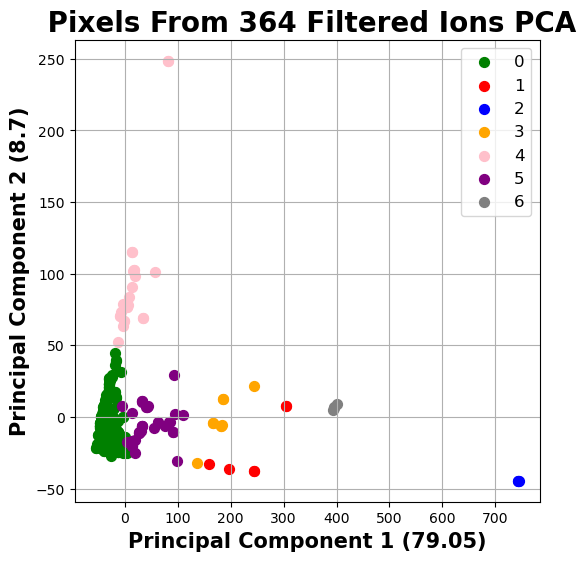

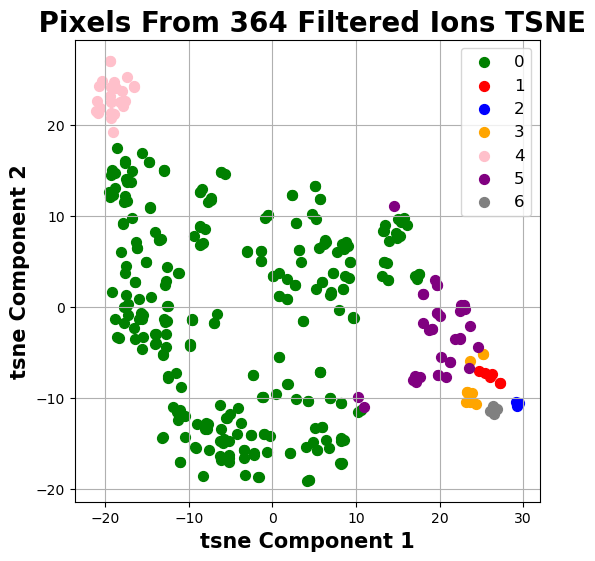

Text(0.5, 1.0, 'UMAP projection of Pixels From 364 Filtered Ions')

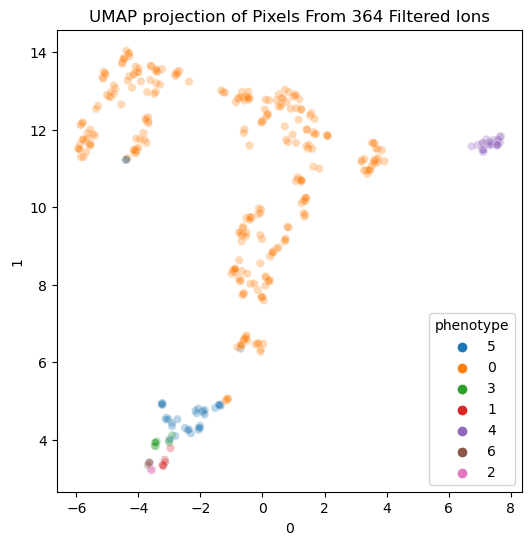

In [5]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/wt_6mo_ion_clustering_pca.tiff', bbox_inches = 'tight')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 364 Filtered Ions', fontsize=12)


Below we save the PCA for the publication without a title and with different font sizes and dimensions.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


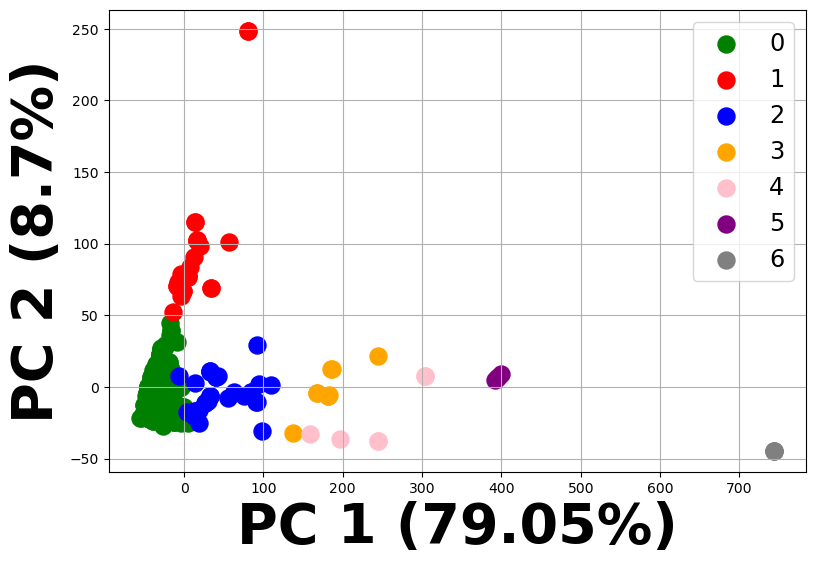

In [6]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Change cluster labels based on PCA plot above
clusterlabels_ordered_wt6 = np.select([clusterlabels == 0, clusterlabels == 4, clusterlabels == 5, clusterlabels == 3, clusterlabels == 1, clusterlabels == 6, clusterlabels == 2], [0, 1, 2, 3, 4, 5, 6], clusterlabels)


# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels_ordered_wt6
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({percent_variance[0]}%)', fontsize = 40, fontweight = 'bold')
ax.set_ylabel(f'PC 2 ({percent_variance[1]}%)', fontsize = 40, fontweight = 'bold')
#ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 150)
ax.legend(labels, fontsize = 'xx-large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/wt_6mo_ion_clustering_pca.tiff', bbox_inches = 'tight')


Below we add the labels

In [7]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels_ordered_wt6
filtered_ions_matrix_no_background_tranposed

2592    2593    2594    2595    2596    2597    2598    2599  \
790.5429   528.0  1106.0  1582.0  1574.0  1100.0  1517.0   568.0   206.0   
700.5101     0.0     0.0   121.0     0.0    39.0     0.0    20.0     0.0   
331.2639   629.0   501.0   629.0   775.0   339.0   398.0   113.0    80.0   
283.2645  2290.0  2507.0  3216.0  3424.0  2132.0  3029.0  2288.0  1702.0   
892.6272    44.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
727.5385     0.0    39.0    70.0     0.0     0.0    27.0    29.0     0.0   
754.5710     0.0     0.0    34.0    26.0     0.0   198.0     0.0     0.0   
749.4791   131.0    29.0    68.0    19.0    60.0    56.0    53.0     0.0   
725.5073     0.0    45.0    32.0    79.0     0.0     0.0    41.0     0.0   
878.6012     0.0     0.0    35.0     0.0    34.0     0.0     0.0    22.0   

            2600    2613  ...   18225   18243   18244   18245   18246   18247  \
790.5429   154.0    46.0  ...   969.0  2234.0  2895.0  2748.0  2447.0  1774.0   
700.5101     0.0    38.0  ...     0.0   163.0   283.0    80.0    96.0   329.0   
331.2639     0.0    50.0  ...    43.0  1025.0   798.0  1013.0  1459.0   768.0   
283.2645  1041.0  2829.0  ...  2582.0  6237.0  4198.0  5155.0  4035.0  2938.0   
892.6272     0.0     0.0  ...    38.0   130.0     5.0   142.0    57.0   146.0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
727.5385     0.0     0.0  ...    58.0    69.0    41.0   244.0   202.0   131.0   
754.5710     0.0     0.0  ...    21.0   218.0   210.0    31.0   140.0   216.0   
749.4791     0.0     0.0  ...   285.0   360.0   198.0   282.0   187.0   201.0   
725.5073     0.0     0.0  ...   127.0   108.0   128.0    21.0   196.0   202.0   
878.6012     0.0     0.0  ...    37.0    22.0   155.0    16.0    78.0    68.0   

           18248   18249   18250  labels  
790.5429  1748.0  7176.0  1606.0       2  
700.5101   241.0   257.0   245.0       0  
331.2639   910.0  1455.0   205.0       0  
283.2645  3021.0  4165.0  1743.0       3  
892.6272    90.0   143.0   182.0       0  
...          ...     ...     ...     ...  
727.5385   134.0  1081.0   159.0       0  
754.5710    41.0   744.0   214.0       0  
749.4791   208.0   230.0   219.0       0  
725.5073   222.0   405.0   499.0       0  
878.6012    24.0   349.0     0.0       0  

[364 rows x 11820 columns]

Below we look at representative ion images from each cluster.

In [8]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['700.5101',
 '331.2639',
 '892.6272',
 '750.5383',
 '683.5000',
 '862.6077',
 '778.5598',
 '696.4663',
 '702.5150',
 '764.5199',
 '866.5098',
 '328.2209',
 '699.4625',
 '748.4763',
 '778.5695',
 '883.5342',
 '674.4731',
 '674.4833',
 '700.5087',
 '773.5332',
 '309.2800',
 '811.5315',
 '685.5149',
 '763.5109',
 '904.6193',
 '683.4808',
 '797.5317',
 '702.4857',
 '764.5082',
 '772.5316',
 '700.5089',
 '772.5276',
 '763.5107',
 '751.5354',
 '749.5209',
 '279.2104',
 '700.4909',
 '891.6346',
 '887.5582',
 '331.2636',
 '683.5007',
 '695.4318',
 '303.2328.1',
 '699.4949',
 '810.5282',
 '253.2175',
 '805.5784',
 '600.5048',
 '284.2680',
 '838.5573',
 '506.2932',
 '696.4677',
 '303.2795',
 '767.5411',
 '798.5340',
 '818.5342',
 '279.2096',
 '862.6048',
 '696.4636',
 '775.5421',
 '721.4932',
 '887.5600',
 '552.2717',
 '284.2681',
 '835.5614',
 '699.4968',
 '702.4774',
 '145.0612',
 '674.4709',
 '750.5397',
 '775.5443',
 '724.5035',
 '858.5206',
 '810.5298',
 '834.5550',
 '884.5394',
 '674.4805

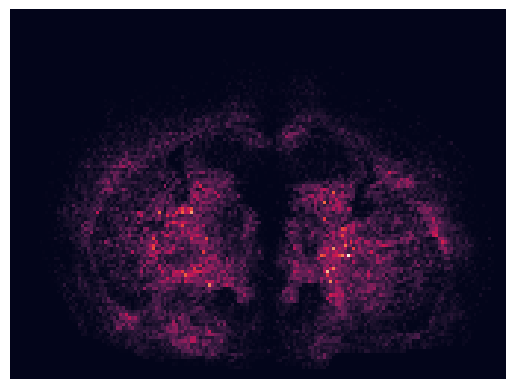

In [15]:
uniform_data_225_a1wt_892_6272 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('892.6272')]
ax = sns.heatmap(uniform_data_225_a1wt_892_6272, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group0_representative_image.tiff')
plt.show()

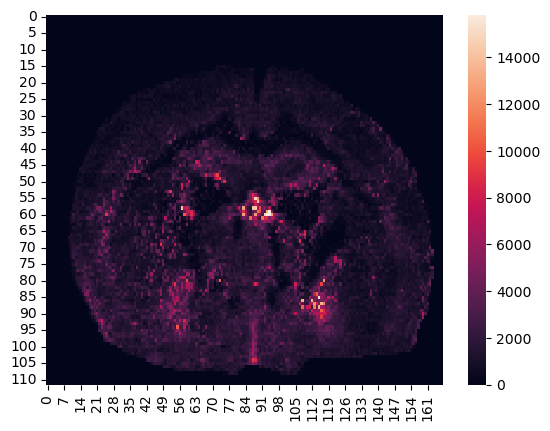

In [9]:
uniform_data_225_a1wt_331_2639 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('331.2639')]
ax = sns.heatmap(uniform_data_225_a1wt_331_2639)
plt.show()

In [9]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['673.4694',
 '889.6260',
 '788.5448',
 '723.4990',
 '888.6245',
 '723.4972',
 '889.6266',
 '788.5443',
 '701.5121',
 '701.4814',
 '788.5429',
 '890.6309',
 '673.4799',
 '723.4991',
 '673.4804',
 '890.6320',
 '673.4666',
 '723.4951',
 '701.5146',
 '888.6234',
 '673.4758',
 '701.5111',
 '890.6331',
 '889.6281']

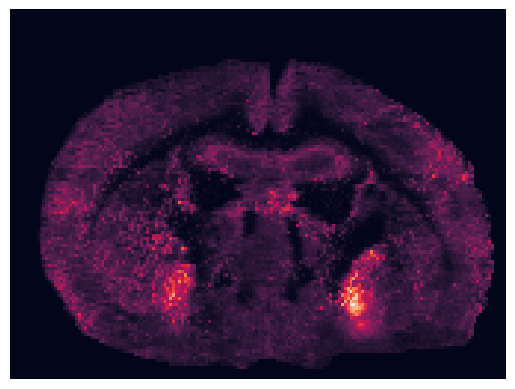

In [16]:
uniform_data_225_a1wt_327_2236 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('327.2236')]
ax = sns.heatmap(uniform_data_225_a1wt_327_2236, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group4_representative_image.tiff')
plt.show()

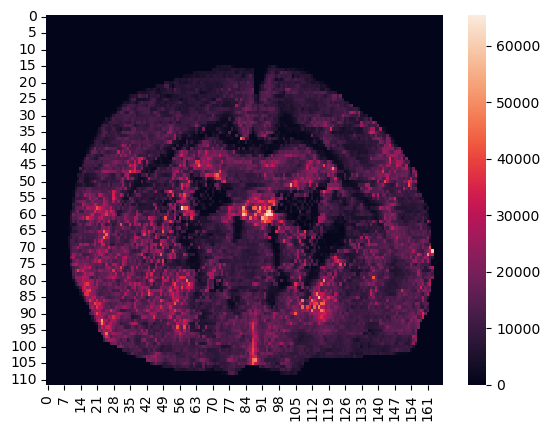

In [12]:
uniform_data_225_a1wt_281_2495 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('281.2495')]
ax = sns.heatmap(uniform_data_225_a1wt_281_2495)
plt.show()

In [10]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['790.5429',
 '255.2333',
 '886.5555',
 '174.0408',
 '836.5353',
 '124.0071',
 '748.5179.1',
 '774.5426',
 '774.5401',
 '886.5565',
 '836.5371',
 '282.2526',
 '791.5422',
 '766.5366',
 '766.5374',
 '746.5150',
 '746.5107',
 '746.5154',
 '790.5375',
 '790.5396',
 '328.2358',
 '747.5095',
 '791.5409',
 '748.5179',
 '836.5377',
 '747.5125',
 '766.5388',
 '774.5427',
 '766.5361',
 '886.5543',
 '748.5185',
 '327.2211',
 '747.5109',
 '836.5352',
 '748.5162']

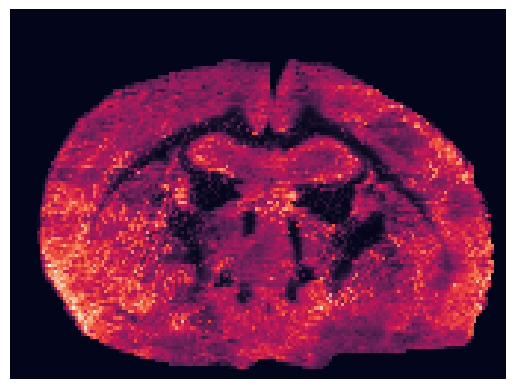

In [17]:
uniform_data_225_a1wt_303_2302 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('303.2302')]
ax = sns.heatmap(uniform_data_225_a1wt_303_2302, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group6_representative_image.tiff')
plt.show()

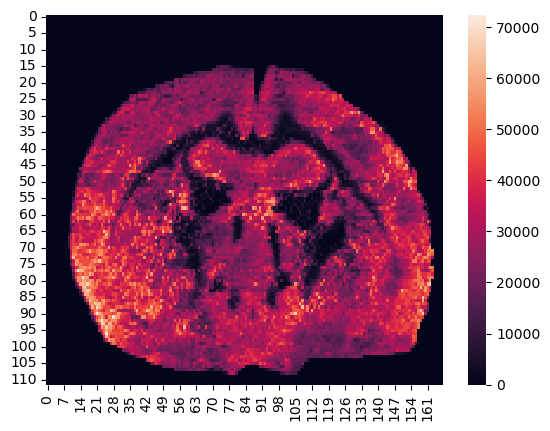

In [15]:
uniform_data_225_a1wt_303_2328 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('303.2328')]
ax = sns.heatmap(uniform_data_225_a1wt_303_2328)
plt.show()

In [11]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['283.2645',
 '835.5336',
 '885.5513',
 '283.2649',
 '835.5316',
 '835.5336.1',
 '885.5498',
 '304.2365',
 '885.5519']

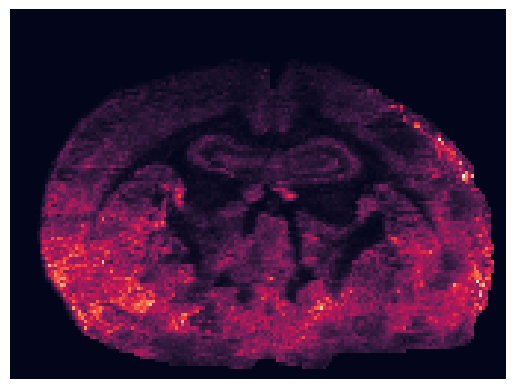

In [18]:
uniform_data_225_a1wt_835_5336 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('835.5336')]
ax = sns.heatmap(uniform_data_225_a1wt_835_5336, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group3_representative_image.tiff')
plt.show()

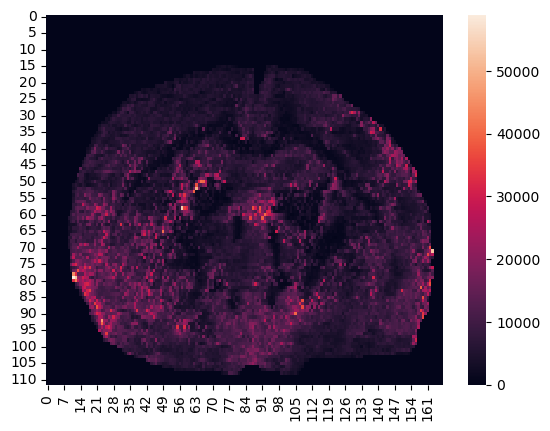

In [18]:
uniform_data_225_a1wt_283_2645 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('283.2645')]
ax = sns.heatmap(uniform_data_225_a1wt_283_2645)
plt.show()

In [12]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['327.2236', '327.2137', '281.2495', '327.2166', '281.2491', '327.2329']

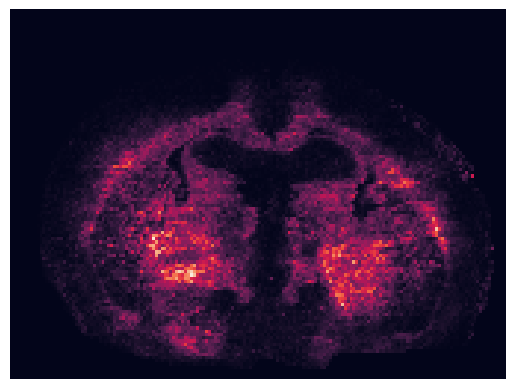

In [19]:
uniform_data_225_a1wt_673_4694 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('673.4694')]
ax = sns.heatmap(uniform_data_225_a1wt_673_4694, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group1_representative_image.tiff')
plt.show()

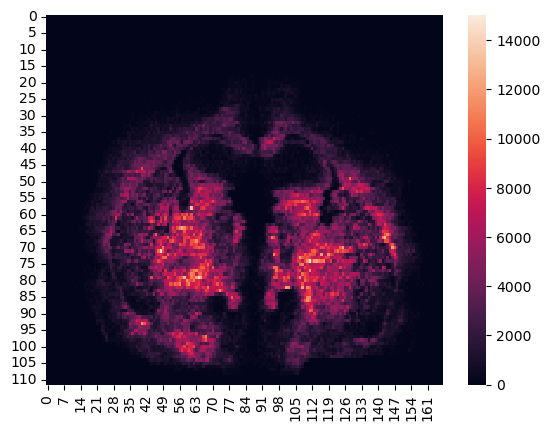

In [21]:
uniform_data_225_a1wt_889_6260 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_225_a1wt_889_6260)
plt.show()

In [13]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['834.5289', '834.5315', '834.5302', '834.5276']

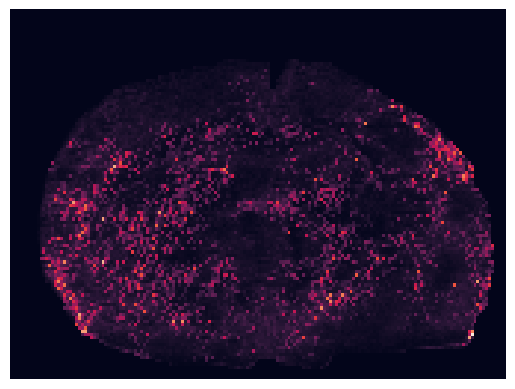

In [20]:
uniform_data_225_a1wt_790_5429 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('174.0408')]
ax = sns.heatmap(uniform_data_225_a1wt_790_5429, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group2_representative_image.tiff')
plt.show()

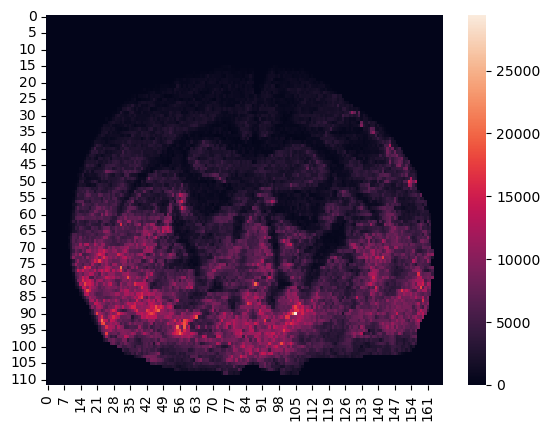

In [24]:
uniform_data_225_a1wt_886_5555 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('886.5555')]
ax = sns.heatmap(uniform_data_225_a1wt_886_5555)
plt.show()

In [14]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['303.2291', '303.2302', '303.2328']

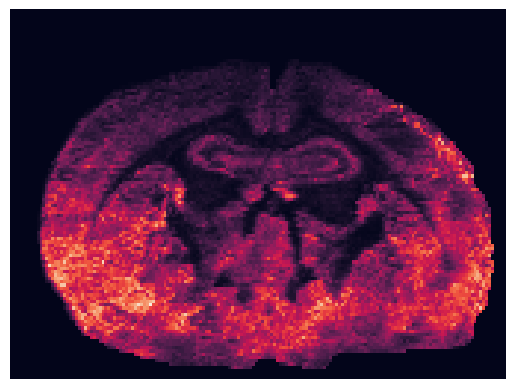

In [21]:
uniform_data_225_a1wt_834_5289 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('834.5289')]
ax = sns.heatmap(uniform_data_225_a1wt_834_5289, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_6mo_group5_representative_image.tiff')
plt.show()

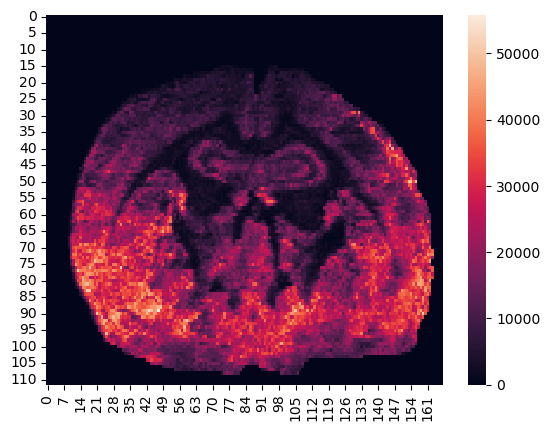

In [27]:
uniform_data_225_a1wt_834_5315 = np.array(masked_metabolomics_matrix_225_a1wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['x_coord'] == coordinates_matrix_225_a1wt.iloc[0][0]]), len(coordinates_matrix_225_a1wt[coordinates_matrix_225_a1wt['y_coord'] == coordinates_matrix_225_a1wt.iloc[0][1]])])[masked_metabolomics_matrix_225_a1wt.columns.get_loc('834.5315')]
ax = sns.heatmap(uniform_data_225_a1wt_834_5315)
plt.show()

Below we create a dataframe for and save the ion clusters.

In [22]:
ion_clusters_wt_6mo = pd.DataFrame({'Group0': pd.Series(group0.index.tolist()), 'Group1': pd.Series(group1.index.tolist()), 
                                    'Group2': pd.Series(group2.index.tolist()), 'Group3': pd.Series(group3.index.tolist()),
                                   'Group4': pd.Series(group4.index.tolist()), 'Group5': pd.Series(group5.index.tolist()),
                                   'Group6': pd.Series(group6.index.tolist())})
ion_clusters_wt_6mo.to_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/6mo_wt_ion_pattern_clusters.csv', index = False)
ion_clusters_wt_6mo

Group0    Group1    Group2    Group3    Group4    Group5    Group6
0    700.5101  673.4694  790.5429  283.2645  327.2236  834.5289  303.2291
1    331.2639  889.6260  255.2333  835.5336  327.2137  834.5315  303.2302
2    892.6272  788.5448  886.5555  885.5513  281.2495  834.5302  303.2328
3    750.5383  723.4990  174.0408  283.2649  327.2166  834.5276       NaN
4    683.5000  888.6245  836.5353  835.5316  281.2491       NaN       NaN
..        ...       ...       ...       ...       ...       ...       ...
278  727.5385       NaN       NaN       NaN       NaN       NaN       NaN
279  754.5710       NaN       NaN       NaN       NaN       NaN       NaN
280  749.4791       NaN       NaN       NaN       NaN       NaN       NaN
281  725.5073       NaN       NaN       NaN       NaN       NaN       NaN
282  878.6012       NaN       NaN       NaN       NaN       NaN       NaN

[283 rows x 7 columns]

<a class="anchor" id="Brain_12mowt"></a>
Below we import a brain for the 12 month wild type.

In [23]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
masked_metabolomics_matrix_278_a2_wt_s1 = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/278_a2_wt_s1_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_278_a2_wt_s1 = pd.read_csv('D:/NEW All AGE Negative TL/AL011223_AGE_278_a2_WT_s1_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [24]:
filtered_ions_matrix = masked_metabolomics_matrix_278_a2_wt_s1[significant_anova_ion_whole_brain['0'].tolist()]
filtered_ions_matrix_no_background = filtered_ions_matrix.loc[(filtered_ions_matrix.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

4124    4125    4126    4127    4128    4129    4130    4131   \
790.5429   963.0  1475.0  1168.0  1543.0  1629.0  1723.0  1412.0  1111.0   
700.5101    22.0    75.0    28.0     0.0   221.0   133.0   188.0    93.0   
331.2639    46.0    59.0    54.0   171.0   145.0   189.0   233.0   137.0   
283.2645  1930.0  2761.0  1933.0  2578.0  3614.0  4032.0  3552.0  3149.0   
892.6272     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
727.5385   263.0   355.0   251.0   356.0   524.0   876.0   348.0   336.0   
754.5710     0.0     0.0    36.0     0.0    17.0     0.0     0.0     0.0   
749.4791   302.0   231.0   171.0   455.0   597.0   881.0   208.0   485.0   
725.5073     0.0    19.0    78.0   123.0   529.0   385.0   383.0   220.0   
878.6012     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

           4132    4245   ...   23447   23448   23449   23450   23451   23566  \
790.5429   959.0  1947.0  ...  3050.0  2373.0  1175.0  3625.0  3263.0  2422.0   
700.5101    82.0    73.0  ...   161.0   134.0    19.0   291.0   214.0     0.0   
331.2639   211.0   234.0  ...   463.0   209.0   139.0   377.0   200.0   197.0   
283.2645  3011.0  4105.0  ...  5755.0  4475.0  2647.0  6982.0  5981.0  3337.0   
892.6272     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
727.5385   553.0   534.0  ...   201.0   379.0   329.0   763.0   980.0   325.0   
754.5710    22.0     0.0  ...    43.0     0.0     0.0    26.0    36.0     0.0   
749.4791   528.0   598.0  ...   207.0   188.0    53.0   335.0   467.0   217.0   
725.5073   267.0   276.0  ...   189.0   230.0    54.0   411.0   271.0   200.0   
878.6012     0.0     0.0  ...    20.0    23.0    19.0     0.0    39.0    29.0   

           23567   23568   23569   23570  
790.5429  1969.0  1576.0  1039.0  1090.0  
700.5101     0.0     0.0     0.0    12.0  
331.2639   189.0   224.0    58.0     0.0  
283.2645  3661.0  2926.0  3529.0  2577.0  
892.6272     0.0     0.0     0.0    22.0  
...          ...     ...     ...     ...  
727.5385   249.0   167.0   147.0    87.0  
754.5710     0.0    20.0     0.0     0.0  
749.4791    78.0   272.0   122.0   108.0  
725.5073    84.0   136.0    49.0    23.0  
878.6012    25.0    53.0     0.0    20.0  

[364 rows x 9512 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


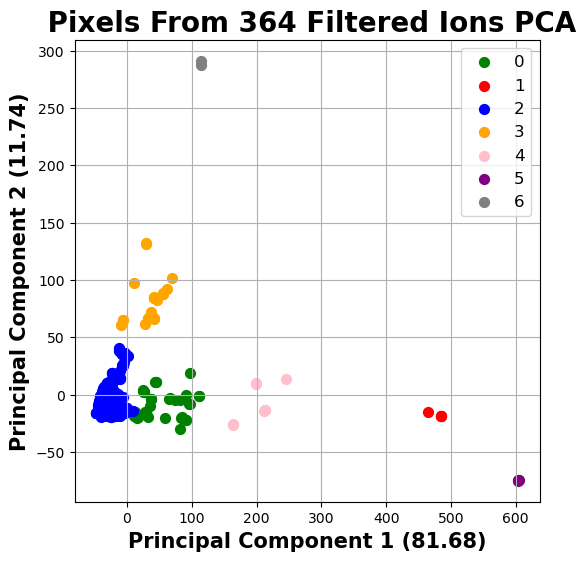

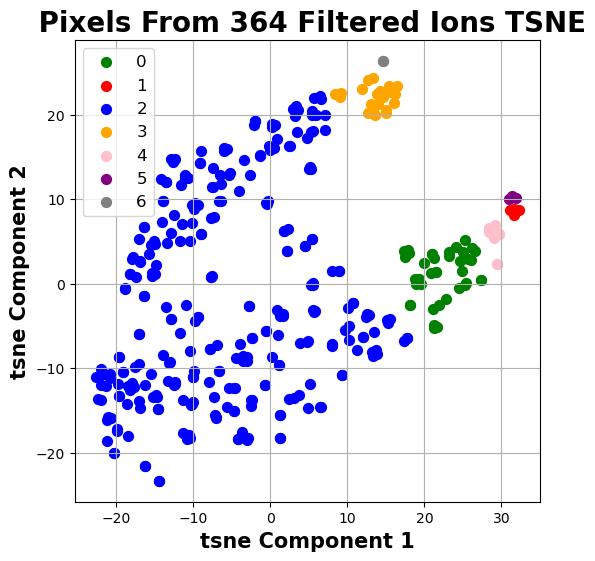

Text(0.5, 1.0, 'UMAP projection of Pixels From 364 Filtered Ions')

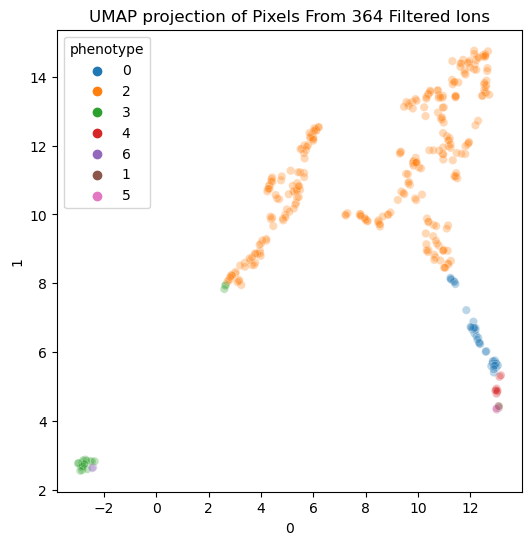

In [25]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/wt_12mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 364 Filtered Ions', fontsize=12)


Below we save the PCA for the publication without a title and with different font sizes and dimensions.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


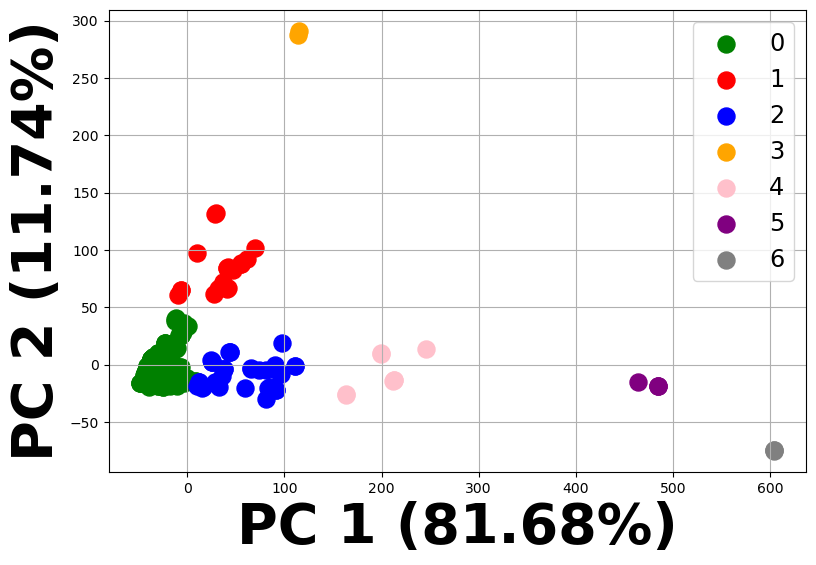

In [26]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Change cluster labels based on PCA plot above
clusterlabels_ordered_wt12 = np.select([clusterlabels == 2, clusterlabels == 3, clusterlabels == 0, clusterlabels == 6, clusterlabels == 4, clusterlabels == 1, clusterlabels == 5], [0, 1, 2, 3, 4, 5, 6], clusterlabels)


# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels_ordered_wt12
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({percent_variance[0]}%)', fontsize = 40, fontweight = 'bold')
ax.set_ylabel(f'PC 2 ({percent_variance[1]}%)', fontsize = 40, fontweight = 'bold')
#ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 150)
ax.legend(labels, fontsize = 'xx-large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/wt_12mo_ion_clustering_pca.tiff', bbox_inches = 'tight')


Below we add the labels

In [27]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels_ordered_wt12
filtered_ions_matrix_no_background_tranposed

4124    4125    4126    4127    4128    4129    4130    4131  \
790.5429   963.0  1475.0  1168.0  1543.0  1629.0  1723.0  1412.0  1111.0   
700.5101    22.0    75.0    28.0     0.0   221.0   133.0   188.0    93.0   
331.2639    46.0    59.0    54.0   171.0   145.0   189.0   233.0   137.0   
283.2645  1930.0  2761.0  1933.0  2578.0  3614.0  4032.0  3552.0  3149.0   
892.6272     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
727.5385   263.0   355.0   251.0   356.0   524.0   876.0   348.0   336.0   
754.5710     0.0     0.0    36.0     0.0    17.0     0.0     0.0     0.0   
749.4791   302.0   231.0   171.0   455.0   597.0   881.0   208.0   485.0   
725.5073     0.0    19.0    78.0   123.0   529.0   385.0   383.0   220.0   
878.6012     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

            4132    4245  ...   23448   23449   23450   23451   23566   23567  \
790.5429   959.0  1947.0  ...  2373.0  1175.0  3625.0  3263.0  2422.0  1969.0   
700.5101    82.0    73.0  ...   134.0    19.0   291.0   214.0     0.0     0.0   
331.2639   211.0   234.0  ...   209.0   139.0   377.0   200.0   197.0   189.0   
283.2645  3011.0  4105.0  ...  4475.0  2647.0  6982.0  5981.0  3337.0  3661.0   
892.6272     0.0     0.0  ...     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
727.5385   553.0   534.0  ...   379.0   329.0   763.0   980.0   325.0   249.0   
754.5710    22.0     0.0  ...     0.0     0.0    26.0    36.0     0.0     0.0   
749.4791   528.0   598.0  ...   188.0    53.0   335.0   467.0   217.0    78.0   
725.5073   267.0   276.0  ...   230.0    54.0   411.0   271.0   200.0    84.0   
878.6012     0.0     0.0  ...    23.0    19.0     0.0    39.0    29.0    25.0   

           23568   23569   23570  labels  
790.5429  1576.0  1039.0  1090.0       2  
700.5101     0.0     0.0    12.0       0  
331.2639   224.0    58.0     0.0       0  
283.2645  2926.0  3529.0  2577.0       2  
892.6272     0.0     0.0    22.0       0  
...          ...     ...     ...     ...  
727.5385   167.0   147.0    87.0       0  
754.5710    20.0     0.0     0.0       0  
749.4791   272.0   122.0   108.0       0  
725.5073   136.0    49.0    23.0       0  
878.6012    53.0     0.0    20.0       0  

[364 rows x 9513 columns]

Below we look at representative ion images from each cluster.

In [28]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['700.5101',
 '331.2639',
 '892.6272',
 '750.5383',
 '683.5000',
 '862.6077',
 '778.5598',
 '696.4663',
 '702.5150',
 '764.5199',
 '866.5098',
 '328.2209',
 '699.4625',
 '748.4763',
 '778.5695',
 '883.5342',
 '674.4731',
 '674.4833',
 '700.5087',
 '773.5332',
 '309.2800',
 '811.5315',
 '685.5149',
 '763.5109',
 '904.6193',
 '683.4808',
 '797.5317',
 '702.4857',
 '764.5082',
 '772.5316',
 '700.5089',
 '772.5276',
 '763.5107',
 '124.0071',
 '751.5354',
 '749.5209',
 '279.2104',
 '700.4909',
 '891.6346',
 '887.5582',
 '331.2636',
 '683.5007',
 '695.4318',
 '303.2328.1',
 '699.4949',
 '810.5282',
 '253.2175',
 '805.5784',
 '600.5048',
 '284.2680',
 '838.5573',
 '506.2932',
 '696.4677',
 '303.2795',
 '767.5411',
 '798.5340',
 '818.5342',
 '279.2096',
 '862.6048',
 '696.4636',
 '775.5421',
 '721.4932',
 '887.5600',
 '552.2717',
 '284.2681',
 '835.5614',
 '699.4968',
 '702.4774',
 '145.0612',
 '674.4709',
 '750.5397',
 '775.5443',
 '724.5035',
 '858.5206',
 '810.5298',
 '834.5550',
 '884.5394

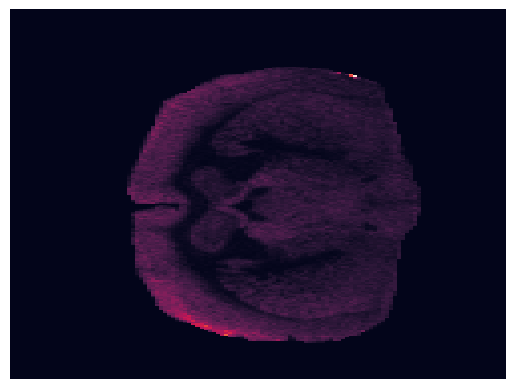

In [35]:
uniform_data_278_a2_wt_s1_790_5429 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('790.5429')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_790_5429, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group2_representative_image.tiff')
plt.show()

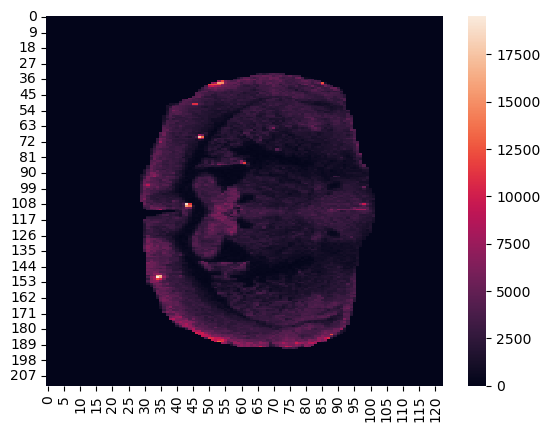

In [35]:
uniform_data_278_a2_wt_s1_283_2645 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('283.2645')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_283_2645)
plt.show()

In [29]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['673.4694',
 '889.6260',
 '788.5448',
 '723.4990',
 '723.4972',
 '889.6266',
 '788.5443',
 '701.5121',
 '788.5429',
 '890.6309',
 '673.4799',
 '723.4991',
 '673.4804',
 '890.6320',
 '673.4666',
 '723.4951',
 '701.5146',
 '673.4758',
 '701.5111',
 '890.6331',
 '889.6281']

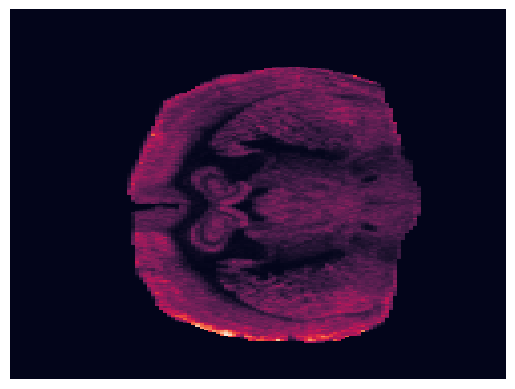

In [36]:
uniform_data_278_a2_wt_s1_834_5276 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('834.5276')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_834_5276, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group5_representative_image.tiff')
plt.show()

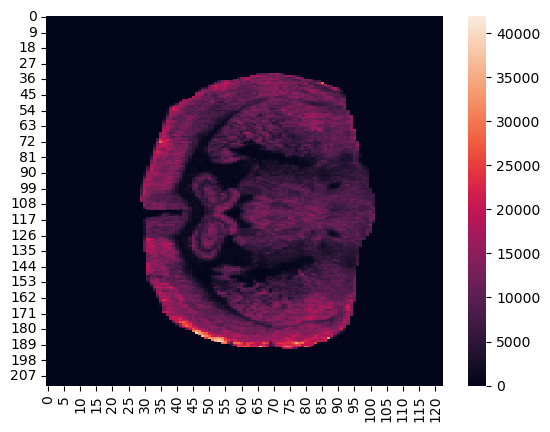

In [38]:
uniform_data_278_a2_wt_s1_834_5289 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('834.5289')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_834_5289)
plt.show()

In [30]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['790.5429',
 '283.2645',
 '255.2333',
 '886.5555',
 '327.2236',
 '327.2137',
 '174.0408',
 '836.5353',
 '748.5179.1',
 '774.5426',
 '774.5401',
 '886.5565',
 '836.5371',
 '865.5027',
 '865.5038',
 '791.5422',
 '766.5366',
 '766.5374',
 '327.2166',
 '283.2649',
 '790.5375',
 '790.5396',
 '747.5095',
 '791.5409',
 '327.2329',
 '748.5179',
 '836.5377',
 '747.5125',
 '766.5388',
 '774.5427',
 '865.5060',
 '766.5361',
 '886.5543',
 '304.2365',
 '748.5185',
 '327.2211',
 '747.5109',
 '836.5352',
 '748.5162']

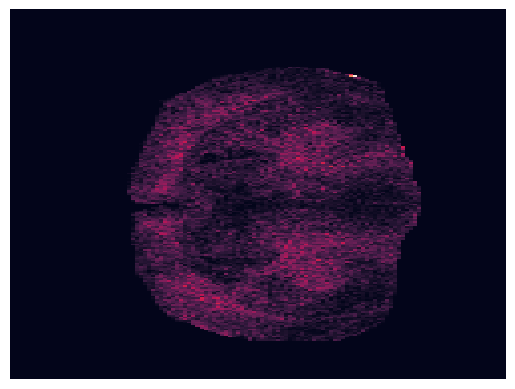

In [37]:
uniform_data_278_a2_wt_s1_700_5101 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('700.5101')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_700_5101, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group0_representative_image.tiff')
plt.show()

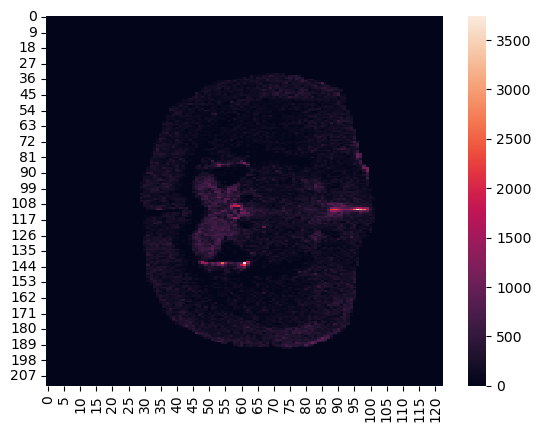

In [41]:
uniform_data_278_a2_wt_s1_331_2639 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('331.2639')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_331_2639)
plt.show()

In [31]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['888.6245', '888.6234']

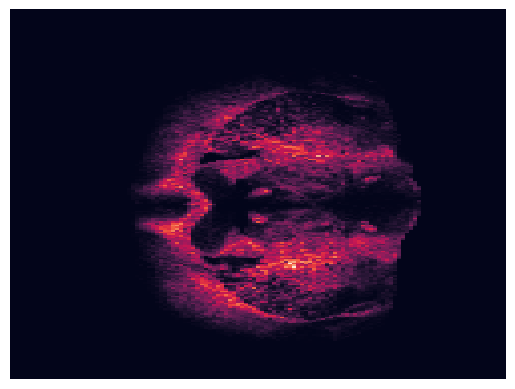

In [38]:
uniform_data_278_a2_wt_s1_889_6260 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_889_6260, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group1_representative_image.tiff')
plt.show()

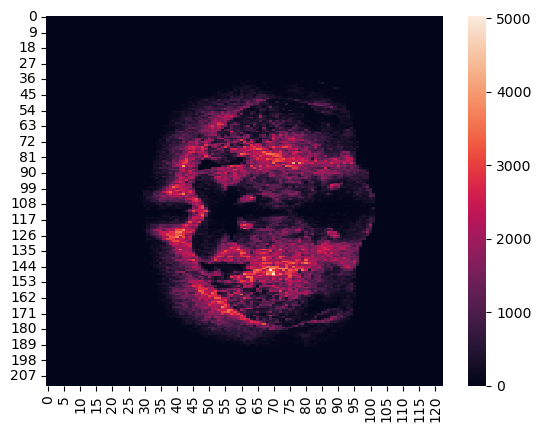

In [44]:
uniform_data_278_a2_wt_s1_889_6260 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_889_6260)
plt.show()

In [32]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['835.5336',
 '885.5513',
 '281.2495',
 '281.2491',
 '835.5316',
 '835.5336.1',
 '885.5498',
 '885.5519']

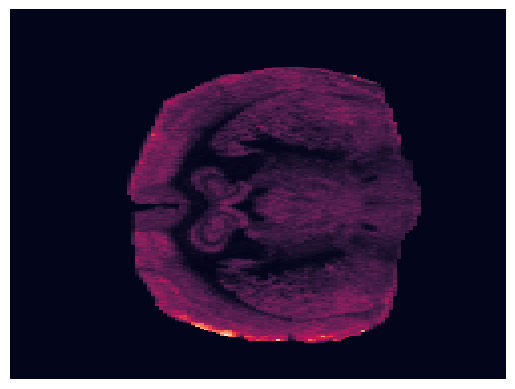

In [39]:
uniform_data_278_a2_wt_s1_835_5336 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('835.5336')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_835_5336, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group4_representative_image.tiff')
plt.show()

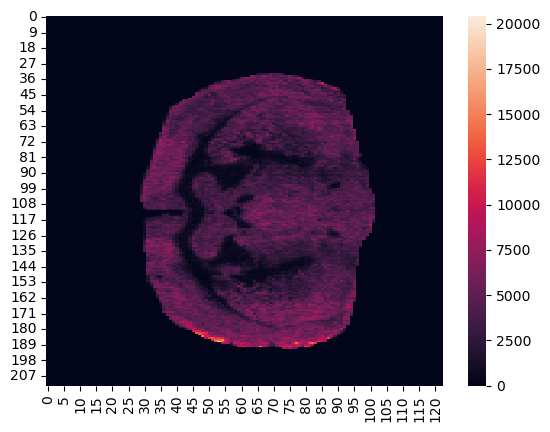

In [47]:
uniform_data_278_a2_wt_s1_885_5513 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('885.5513')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_885_5513)
plt.show()

In [33]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['834.5289', '834.5315', '834.5302', '834.5276']

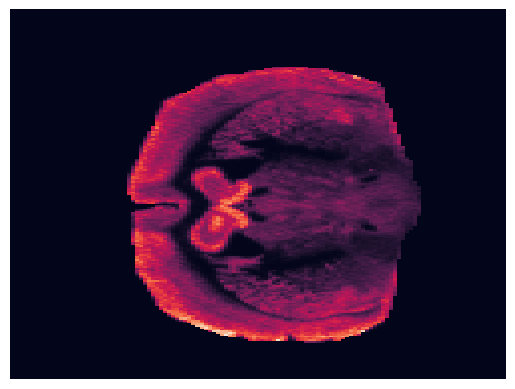

In [40]:
uniform_data_278_a2_wt_s1_303_2291 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('303.2291')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_303_2291, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group6_representative_image.tiff')
plt.show()

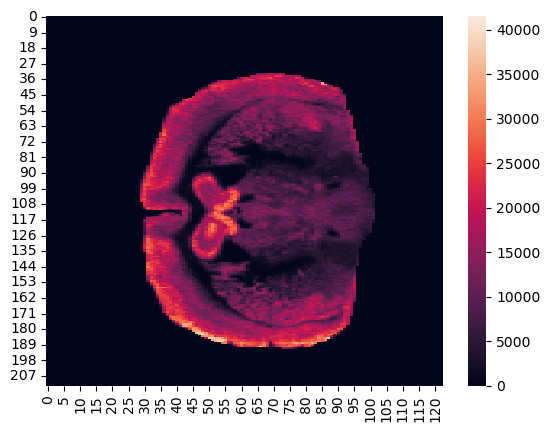

In [50]:
uniform_data_278_a2_wt_s1_303_2302 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('303.2302')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_303_2302)
plt.show()

In [34]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['303.2291', '303.2302', '303.2328']

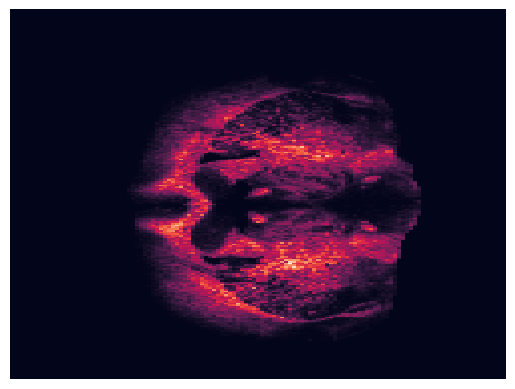

In [41]:
uniform_data_278_a2_wt_s1_888_6245 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('888.6245')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_888_6245, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_12mo_group3_representative_image.tiff')
plt.show()

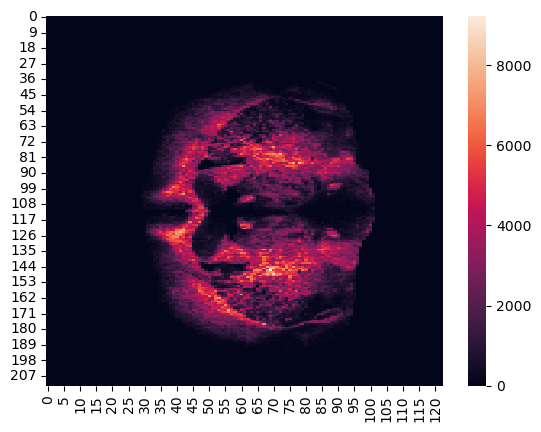

In [53]:
uniform_data_278_a2_wt_s1_888_6234 = np.array(masked_metabolomics_matrix_278_a2_wt_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['x_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][0]]), len(coordinates_matrix_278_a2_wt_s1[coordinates_matrix_278_a2_wt_s1['y_coord'] == coordinates_matrix_278_a2_wt_s1.iloc[0][1]])])[masked_metabolomics_matrix_278_a2_wt_s1.columns.get_loc('888.6234')]
ax = sns.heatmap(uniform_data_278_a2_wt_s1_888_6234)
plt.show()

Below we create a dataframe for and save the ion clusters.

In [42]:
ion_clusters_wt_12mo = pd.DataFrame({'Group0': pd.Series(group0.index.tolist()), 'Group1': pd.Series(group1.index.tolist()), 
                                    'Group2': pd.Series(group2.index.tolist()), 'Group3': pd.Series(group3.index.tolist()),
                                   'Group4': pd.Series(group4.index.tolist()), 'Group5': pd.Series(group5.index.tolist()),
                                   'Group6': pd.Series(group6.index.tolist())})
ion_clusters_wt_12mo.to_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/12mo_wt_ion_pattern_clusters.csv', index = False)
ion_clusters_wt_12mo

Group0    Group1    Group2    Group3    Group4    Group5    Group6
0    700.5101  673.4694  790.5429  888.6245  835.5336  834.5289  303.2291
1    331.2639  889.6260  283.2645  888.6234  885.5513  834.5315  303.2302
2    892.6272  788.5448  255.2333       NaN  281.2495  834.5302  303.2328
3    750.5383  723.4990  886.5555       NaN  281.2491  834.5276       NaN
4    683.5000  723.4972  327.2236       NaN  835.5316       NaN       NaN
..        ...       ...       ...       ...       ...       ...       ...
282  727.5385       NaN       NaN       NaN       NaN       NaN       NaN
283  754.5710       NaN       NaN       NaN       NaN       NaN       NaN
284  749.4791       NaN       NaN       NaN       NaN       NaN       NaN
285  725.5073       NaN       NaN       NaN       NaN       NaN       NaN
286  878.6012       NaN       NaN       NaN       NaN       NaN       NaN

[287 rows x 7 columns]

<a class="anchor" id="Brain_22mowt"></a>
Below we import a brain for the 22 month wild type.

In [43]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
masked_metabolomics_matrix_191_a3wt = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/191_a3wt_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_191_a3wt = pd.read_csv('D:/NEW All AGE Negative TL/AL080321_191_a3wt_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [44]:
filtered_ions_matrix = masked_metabolomics_matrix_191_a3wt[significant_anova_ion_whole_brain['0'].tolist()]
filtered_ions_matrix_no_background = filtered_ions_matrix.loc[(filtered_ions_matrix.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

2870     2871    2872    2873    2874    2875    2876    2877   \
790.5429   1713.0   1396.0  1706.0  1415.0  1273.0  1551.0  1517.0  1545.0   
700.5101     40.0    149.0    29.0    44.0    56.0     0.0    32.0    65.0   
331.2639   1243.0    631.0   315.0   227.0   547.0  1041.0  1082.0   928.0   
283.2645  10270.0  10156.0  5626.0  5149.0  6939.0  7201.0  8403.0  5721.0   
892.6272      0.0      0.0     0.0    43.0     0.0     0.0    23.0     0.0   
...           ...      ...     ...     ...     ...     ...     ...     ...   
727.5385    244.0     43.0    74.0   110.0    44.0   111.0   195.0    50.0   
754.5710     90.0     27.0     2.0    30.0    40.0    64.0    28.0   109.0   
749.4791     85.0    168.0    21.0    66.0   162.0   140.0   173.0   322.0   
725.5073     91.0     20.0    22.0    66.0    38.0     0.0   207.0    24.0   
878.6012     41.0     72.0    30.0    35.0     0.0     0.0    21.0    33.0   

           2878    2879   ...   16888   16889   16890    16893   16894  \
790.5429  1837.0  1605.0  ...  2177.0  2105.0  2803.0   3028.0  2246.0   
700.5101    85.0    79.0  ...   154.0   181.0    94.0    280.0     5.0   
331.2639   969.0   930.0  ...  3439.0  2136.0  2229.0   2544.0  1851.0   
283.2645  7251.0  5206.0  ...  9191.0  7734.0  7534.0  11626.0  8956.0   
892.6272    22.0     0.0  ...     0.0    32.0   179.0    173.0    26.0   
...          ...     ...  ...     ...     ...     ...      ...     ...   
727.5385   141.0   183.0  ...   150.0   181.0    45.0    151.0   143.0   
754.5710    42.0    37.0  ...    24.0    27.0   174.0    143.0   380.0   
749.4791   409.0   105.0  ...   333.0   524.0   596.0    278.0   261.0   
725.5073    20.0    22.0  ...    99.0    56.0   207.0     34.0    74.0   
878.6012    21.0    26.0  ...    67.0    22.0    49.0    192.0    92.0   

           17060   17061   17062   17063   17064  
790.5429  1217.0   918.0  1026.0   530.0  1038.0  
700.5101    99.0    74.0    53.0   137.0    57.0  
331.2639  2957.0  2079.0  1971.0  1169.0   502.0  
283.2645  7755.0  6538.0  6492.0  4545.0  4238.0  
892.6272    20.0     0.0     0.0     0.0    44.0  
...          ...     ...     ...     ...     ...  
727.5385   116.0    84.0    44.0    31.0   118.0  
754.5710    36.0   104.0     0.0    10.0   104.0  
749.4791   198.0    99.0    87.0   101.0    93.0  
725.5073    67.0     0.0    30.0    85.0     0.0  
878.6012    20.0     0.0    22.0   128.0    30.0  

[364 rows x 10255 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


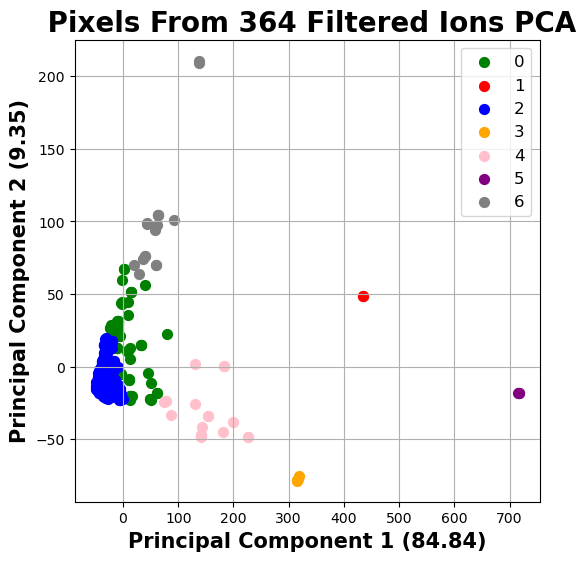

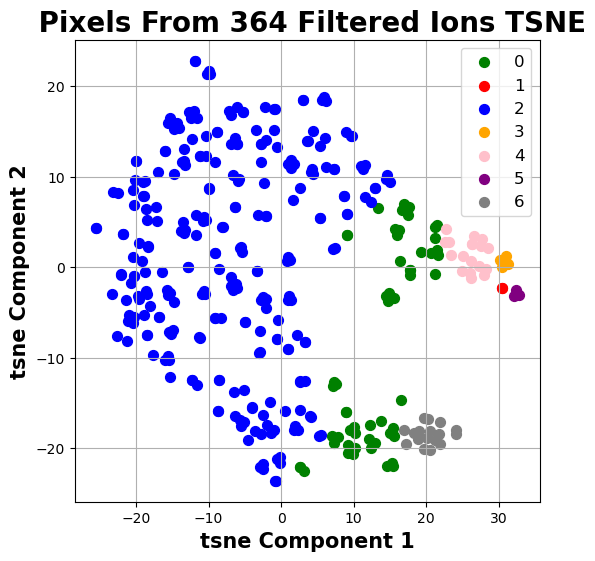

Text(0.5, 1.0, 'UMAP projection of Pixels From 364 Filtered Ions')

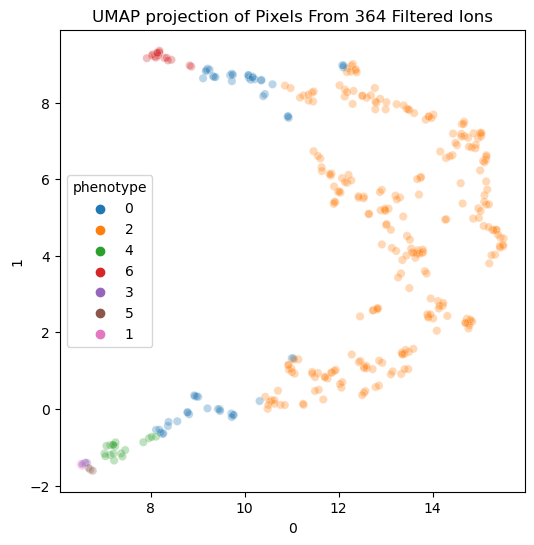

In [45]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/wt_22mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 364 Filtered Ions', fontsize=12)


Below we save the PCA for the publication without a title and with different font sizes and dimensions.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


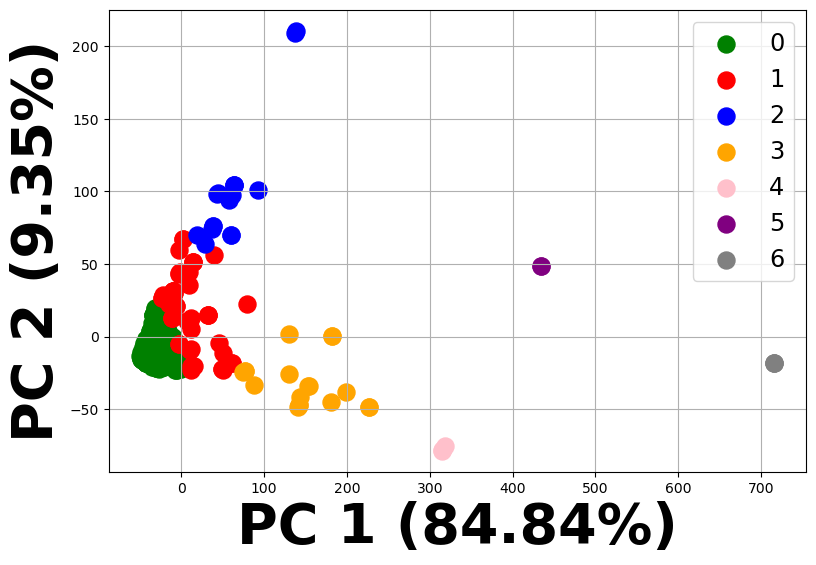

In [46]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Change cluster labels based on PCA plot above
clusterlabels_ordered_wt22 = np.select([clusterlabels == 2, clusterlabels == 0, clusterlabels == 6, clusterlabels == 4, clusterlabels == 3, clusterlabels == 1, clusterlabels == 5], [0, 1, 2, 3, 4, 5, 6], clusterlabels)

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels_ordered_wt22
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({percent_variance[0]}%)', fontsize = 40, fontweight = 'bold')
ax.set_ylabel(f'PC 2 ({percent_variance[1]}%)', fontsize = 40, fontweight = 'bold')
#ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 150)
ax.legend(labels, fontsize = 'xx-large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/wt_22mo_ion_clustering_pca.tiff', bbox_inches = 'tight')


Below we add the labels

In [55]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels_ordered_wt22
filtered_ions_matrix_no_background_tranposed

2870     2871    2872    2873    2874    2875    2876    2877  \
790.5429   1713.0   1396.0  1706.0  1415.0  1273.0  1551.0  1517.0  1545.0   
700.5101     40.0    149.0    29.0    44.0    56.0     0.0    32.0    65.0   
331.2639   1243.0    631.0   315.0   227.0   547.0  1041.0  1082.0   928.0   
283.2645  10270.0  10156.0  5626.0  5149.0  6939.0  7201.0  8403.0  5721.0   
892.6272      0.0      0.0     0.0    43.0     0.0     0.0    23.0     0.0   
...           ...      ...     ...     ...     ...     ...     ...     ...   
727.5385    244.0     43.0    74.0   110.0    44.0   111.0   195.0    50.0   
754.5710     90.0     27.0     2.0    30.0    40.0    64.0    28.0   109.0   
749.4791     85.0    168.0    21.0    66.0   162.0   140.0   173.0   322.0   
725.5073     91.0     20.0    22.0    66.0    38.0     0.0   207.0    24.0   
878.6012     41.0     72.0    30.0    35.0     0.0     0.0    21.0    33.0   

            2878    2879  ...   16889   16890    16893   16894   17060  \
790.5429  1837.0  1605.0  ...  2105.0  2803.0   3028.0  2246.0  1217.0   
700.5101    85.0    79.0  ...   181.0    94.0    280.0     5.0    99.0   
331.2639   969.0   930.0  ...  2136.0  2229.0   2544.0  1851.0  2957.0   
283.2645  7251.0  5206.0  ...  7734.0  7534.0  11626.0  8956.0  7755.0   
892.6272    22.0     0.0  ...    32.0   179.0    173.0    26.0    20.0   
...          ...     ...  ...     ...     ...      ...     ...     ...   
727.5385   141.0   183.0  ...   181.0    45.0    151.0   143.0   116.0   
754.5710    42.0    37.0  ...    27.0   174.0    143.0   380.0    36.0   
749.4791   409.0   105.0  ...   524.0   596.0    278.0   261.0   198.0   
725.5073    20.0    22.0  ...    56.0   207.0     34.0    74.0    67.0   
878.6012    21.0    26.0  ...    22.0    49.0    192.0    92.0    20.0   

           17061   17062   17063   17064  labels  
790.5429   918.0  1026.0   530.0  1038.0       1  
700.5101    74.0    53.0   137.0    57.0       0  
331.2639  2079.0  1971.0  1169.0   502.0       1  
283.2645  6538.0  6492.0  4545.0  4238.0       3  
892.6272     0.0     0.0     0.0    44.0       0  
...          ...     ...     ...     ...     ...  
727.5385    84.0    44.0    31.0   118.0       1  
754.5710   104.0     0.0    10.0   104.0       0  
749.4791    99.0    87.0   101.0    93.0       0  
725.5073     0.0    30.0    85.0     0.0       0  
878.6012     0.0    22.0   128.0    30.0       0  

[364 rows x 10256 columns]

Below we look at representative ion images from each cluster.

In [56]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['700.5101',
 '892.6272',
 '750.5383',
 '683.5000',
 '862.6077',
 '778.5598',
 '696.4663',
 '764.5199',
 '866.5098',
 '328.2209',
 '699.4625',
 '748.4763',
 '778.5695',
 '883.5342',
 '674.4833',
 '700.5087',
 '773.5332',
 '309.2800',
 '811.5315',
 '685.5149',
 '763.5109',
 '904.6193',
 '683.4808',
 '797.5317',
 '702.4857',
 '764.5082',
 '772.5316',
 '700.5089',
 '772.5276',
 '763.5107',
 '124.0071',
 '751.5354',
 '749.5209',
 '279.2104',
 '700.4909',
 '891.6346',
 '887.5582',
 '683.5007',
 '695.4318',
 '303.2328.1',
 '253.2175',
 '805.5784',
 '600.5048',
 '284.2680',
 '838.5573',
 '506.2932',
 '696.4677',
 '303.2795',
 '767.5411',
 '798.5340',
 '818.5342',
 '279.2096',
 '862.6048',
 '696.4636',
 '775.5421',
 '721.4932',
 '887.5600',
 '552.2717',
 '284.2681',
 '835.5614',
 '702.4774',
 '145.0612',
 '750.5397',
 '775.5443',
 '724.5035',
 '858.5206',
 '834.5550',
 '884.5394',
 '306.0762',
 '723.4531',
 '762.5069',
 '721.4966',
 '806.5389',
 '764.5184',
 '837.5403',
 '865.5027',
 '858.5237

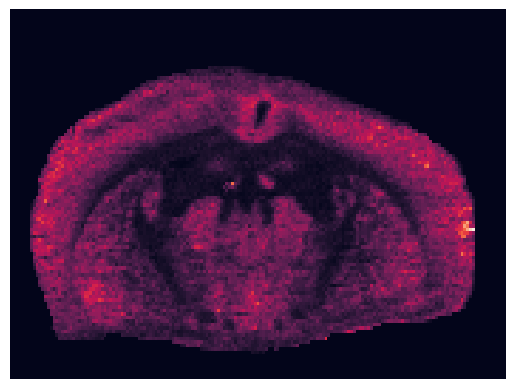

In [65]:
uniform_data_191_a3wt_790_5429 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('790.5429')]
ax = sns.heatmap(uniform_data_191_a3wt_790_5429, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group1_representative_image.tiff')
plt.show()

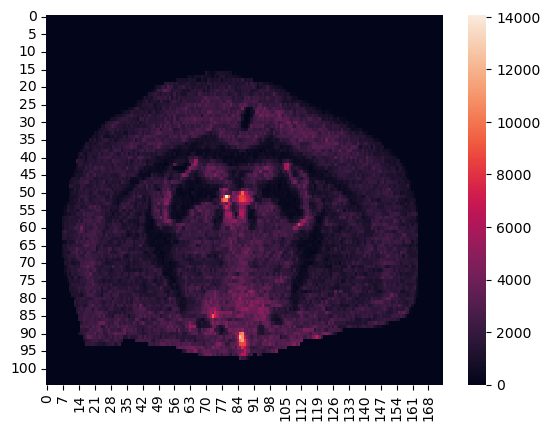

In [61]:
uniform_data_191_a3wt_331_2639 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('331.2639')]
ax = sns.heatmap(uniform_data_191_a3wt_331_2639)
plt.show()

In [57]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['790.5429',
 '331.2639',
 '886.5555',
 '702.5150',
 '674.4731',
 '174.0408',
 '836.5353',
 '748.5179.1',
 '723.4990',
 '331.2636',
 '774.5426',
 '699.4949',
 '810.5282',
 '774.5401',
 '723.4972',
 '886.5565',
 '699.4968',
 '674.4709',
 '810.5298',
 '674.4805',
 '836.5371',
 '282.2526',
 '299.9460',
 '766.5366',
 '766.5374',
 '701.4814',
 '790.5375',
 '790.5396',
 '890.6309',
 '328.2358',
 '748.5179',
 '723.4991',
 '726.5419',
 '836.5377',
 '890.6320',
 '789.5480',
 '789.5463',
 '747.5125',
 '699.4911',
 '766.5388',
 '774.5427',
 '766.5361',
 '789.5474',
 '810.5292',
 '702.5179',
 '727.5335.1',
 '726.5410',
 '890.6331',
 '727.5335',
 '748.5185',
 '702.5128',
 '726.5406',
 '699.4951',
 '836.5352',
 '748.5162',
 '727.5385']

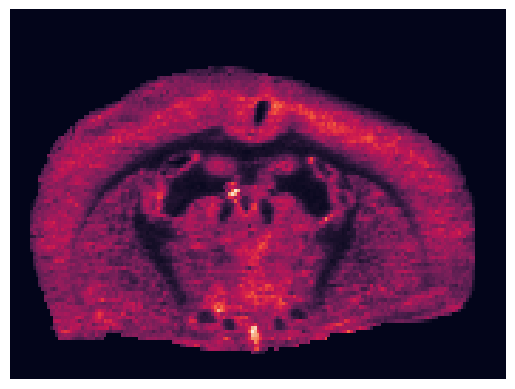

In [64]:
uniform_data_191_a3wt_281_2495 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('281.2495')]
ax = sns.heatmap(uniform_data_191_a3wt_281_2495, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group5_representative_image.tiff')
plt.show()

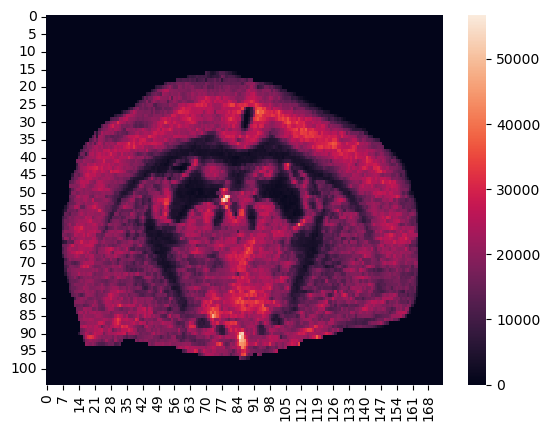

In [64]:
uniform_data_191_a3wt_281_2491 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('281.2491')]
ax = sns.heatmap(uniform_data_191_a3wt_281_2491)
plt.show()

In [50]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['673.4694',
 '889.6260',
 '788.5448',
 '888.6245',
 '889.6266',
 '788.5443',
 '701.5121',
 '788.5429',
 '673.4799',
 '673.4804',
 '673.4666',
 '723.4951',
 '701.5146',
 '888.6234',
 '673.4758',
 '701.5111',
 '889.6281']

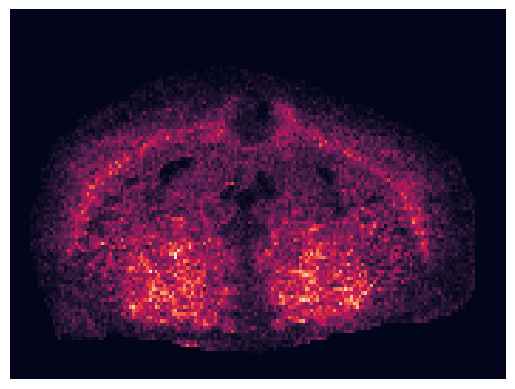

In [63]:
uniform_data_191_a3wt_700_5101 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('700.5101')]
ax = sns.heatmap(uniform_data_191_a3wt_700_5101, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group0_representative_image.tiff')
plt.show()

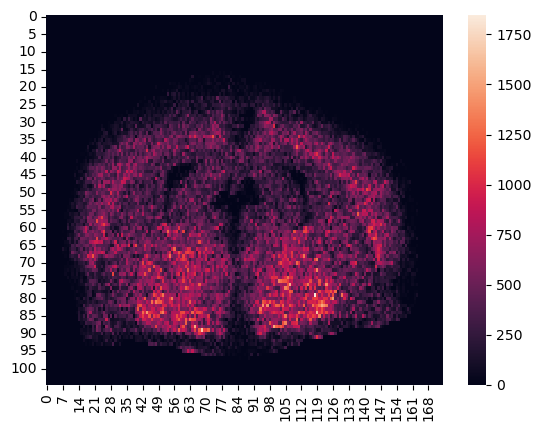

In [67]:
uniform_data_191_a3wt_892_6272 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('892.6272')]
ax = sns.heatmap(uniform_data_191_a3wt_892_6272)
plt.show()

In [51]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['283.2645',
 '255.2333',
 '327.2236',
 '327.2137',
 '835.5336',
 '885.5513',
 '327.2166',
 '283.2649',
 '835.5316',
 '747.5095',
 '327.2329',
 '835.5336.1',
 '885.5498',
 '886.5543',
 '304.2365',
 '885.5519',
 '327.2211',
 '747.5109']

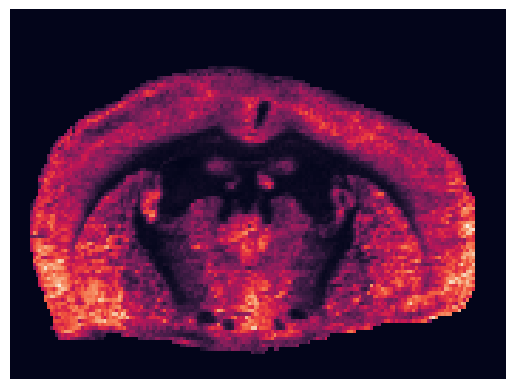

In [62]:
uniform_data_191_a3wt_834_5289 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('834.5289')]
ax = sns.heatmap(uniform_data_191_a3wt_834_5289, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group4_representative_image.tiff')
plt.show()

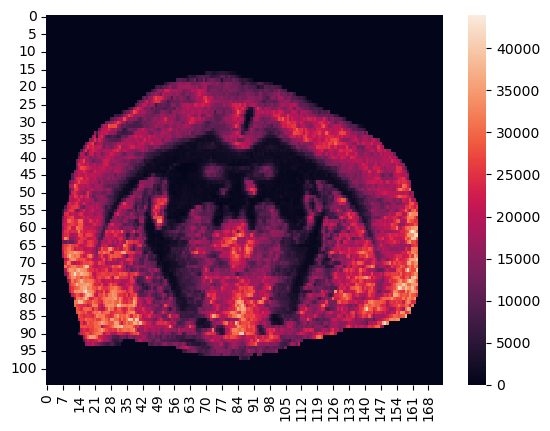

In [70]:
uniform_data_191_a3wt_834_5315 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('834.5315')]
ax = sns.heatmap(uniform_data_191_a3wt_834_5315)
plt.show()

In [52]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['834.5289', '834.5315', '834.5302', '834.5276']

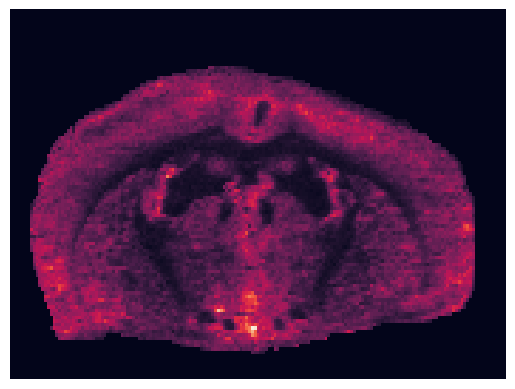

In [61]:
uniform_data_191_a3wt_283_2645 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('283.2645')]
ax = sns.heatmap(uniform_data_191_a3wt_283_2645, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group3_representative_image.tiff')
plt.show()

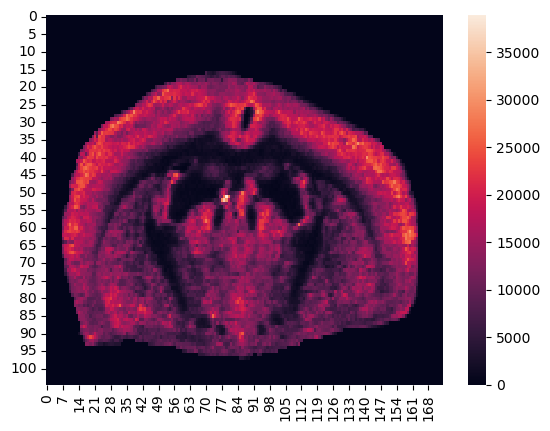

In [73]:
uniform_data_191_a3wt_327_2236 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('327.2236')]
ax = sns.heatmap(uniform_data_191_a3wt_327_2236)
plt.show()

In [53]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['281.2495', '281.2491']

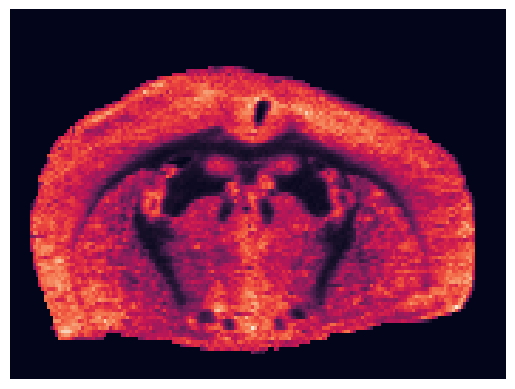

In [60]:
uniform_data_191_a3wt_303_2291 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('303.2291')]
ax = sns.heatmap(uniform_data_191_a3wt_303_2291, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group6_representative_image.tiff')
plt.show()

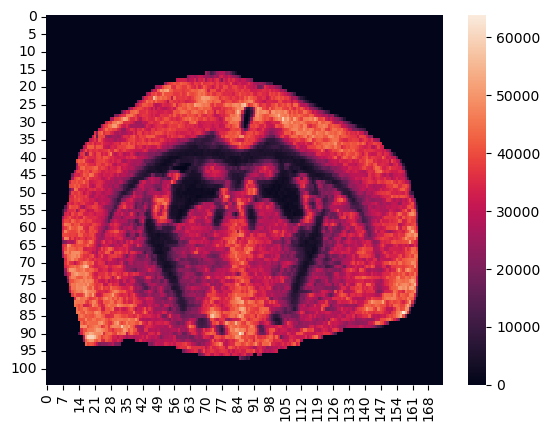

In [76]:
uniform_data_191_a3wt_303_2302 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('303.2302')]
ax = sns.heatmap(uniform_data_191_a3wt_303_2302)
plt.show()

In [54]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['303.2291', '303.2302', '303.2328']

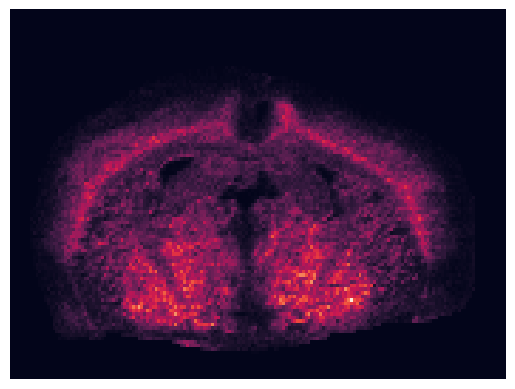

In [58]:
uniform_data_191_a3wt_673_4694 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('673.4694')]
ax = sns.heatmap(uniform_data_191_a3wt_673_4694, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_wt_22mo_group2_representative_image.tiff')
plt.show()

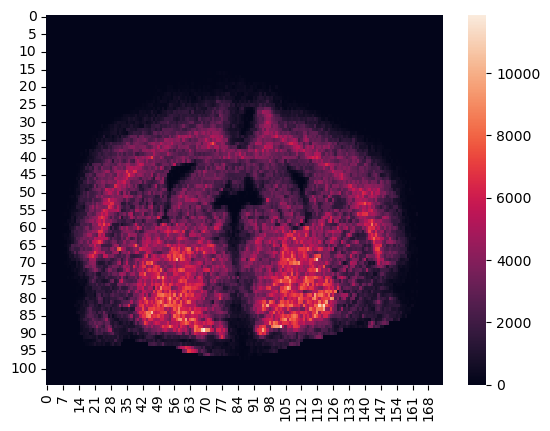

In [79]:
uniform_data_191_a3wt_889_6260 = np.array(masked_metabolomics_matrix_191_a3wt).T.reshape([num_metabolites_negative, len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['x_coord'] == coordinates_matrix_191_a3wt.iloc[0][0]]), len(coordinates_matrix_191_a3wt[coordinates_matrix_191_a3wt['y_coord'] == coordinates_matrix_191_a3wt.iloc[0][1]])])[masked_metabolomics_matrix_191_a3wt.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_191_a3wt_889_6260)
plt.show()

Below we create a dataframe for and save the ion clusters.

In [59]:
ion_clusters_wt_22mo = pd.DataFrame({'Group0': pd.Series(group0.index.tolist()), 'Group1': pd.Series(group1.index.tolist()), 
                                    'Group2': pd.Series(group2.index.tolist()), 'Group3': pd.Series(group3.index.tolist()),
                                   'Group4': pd.Series(group4.index.tolist()), 'Group5': pd.Series(group5.index.tolist()),
                                   'Group6': pd.Series(group6.index.tolist())})
ion_clusters_wt_22mo.to_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/22mo_wt_ion_pattern_clusters.csv', index = False)
ion_clusters_wt_22mo

Group0    Group1    Group2    Group3    Group4    Group5    Group6
0    700.5101  790.5429  673.4694  283.2645  834.5289  281.2495  303.2291
1    892.6272  331.2639  889.6260  255.2333  834.5315  281.2491  303.2302
2    750.5383  886.5555  788.5448  327.2236  834.5302       NaN  303.2328
3    683.5000  702.5150  888.6245  327.2137  834.5276       NaN       NaN
4    862.6077  674.4731  889.6266  835.5336       NaN       NaN       NaN
..        ...       ...       ...       ...       ...       ...       ...
259  336.0777       NaN       NaN       NaN       NaN       NaN       NaN
260  754.5710       NaN       NaN       NaN       NaN       NaN       NaN
261  749.4791       NaN       NaN       NaN       NaN       NaN       NaN
262  725.5073       NaN       NaN       NaN       NaN       NaN       NaN
263  878.6012       NaN       NaN       NaN       NaN       NaN       NaN

[264 rows x 7 columns]

<a class="anchor" id="Brain_6motg"></a>
Below we import a brain for the 6 month tg.

In [66]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
masked_metabolomics_matrix_225_3tg = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/225_3tg_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_225_3tg = pd.read_csv('D:/NEW All AGE Negative TL/AL080521_225_3tg_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [67]:
filtered_ions_matrix = masked_metabolomics_matrix_225_3tg[significant_anova_ion_whole_brain['0'].tolist()]
filtered_ions_matrix_no_background = filtered_ions_matrix.loc[(filtered_ions_matrix.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

3075    3076    3077    3078    3079    3080    3247    3248   \
790.5429   929.0   755.0  1242.0   822.0   891.0  1301.0  1626.0  1705.0   
700.5101     0.0    72.0    33.0    30.0    50.0    20.0    83.0     7.0   
331.2639   259.0    78.0   197.0   506.0   204.0   202.0   338.0   526.0   
283.2645  1667.0  2154.0  2458.0  1635.0  2420.0  2070.0  3276.0  2606.0   
892.6272     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
727.5385    51.0    21.0    76.0     0.0    10.0    33.0     6.0     0.0   
754.5710     0.0    44.0     0.0     0.0    32.0     0.0     0.0     0.0   
749.4791    98.0   109.0   205.0   100.0     6.0    20.0   242.0   241.0   
725.5073     0.0    29.0    81.0    26.0    29.0    39.0    89.0    32.0   
878.6012     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

           3249    3250   ...   20671   20672   20673   20674   20675   20676  \
790.5429  1347.0  1472.0  ...   583.0  1388.0  1388.0  1471.0  1738.0  1624.0   
700.5101    25.0    30.0  ...    92.0   165.0   258.0   106.0   174.0     0.0   
331.2639   301.0   621.0  ...   254.0   347.0   555.0   286.0   935.0   405.0   
283.2645  2896.0  2960.0  ...  1905.0  2816.0  3256.0  4042.0  5227.0  4871.0   
892.6272    14.0    19.0  ...    43.0     6.0     0.0     0.0    34.0     0.0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
727.5385    57.0    20.0  ...    28.0   104.0   138.0    58.0    20.0    69.0   
754.5710    36.0    52.0  ...    10.0    35.0    97.0    17.0    31.0     0.0   
749.4791   268.0    61.0  ...    81.0   347.0   460.0   270.0   452.0   358.0   
725.5073    21.0    39.0  ...    91.0    58.0   165.0   155.0    87.0    89.0   
878.6012     0.0     0.0  ...    51.0    42.0    27.0    70.0    99.0    44.0   

           20677   20678   20679   20680  
790.5429  1604.0  1417.0   915.0  1277.0  
700.5101    58.0     0.0    56.0    75.0  
331.2639   833.0   457.0   792.0   881.0  
283.2645  5131.0  3243.0  5042.0  5279.0  
892.6272    24.0     0.0    27.0     0.0  
...          ...     ...     ...     ...  
727.5385    72.0    70.0    36.0   150.0  
754.5710     0.0     0.0     0.0    23.0  
749.4791   161.0    68.0   193.0   321.0  
725.5073   106.0   113.0   130.0   129.0  
878.6012    24.0     0.0     0.0     0.0  

[364 rows x 11605 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


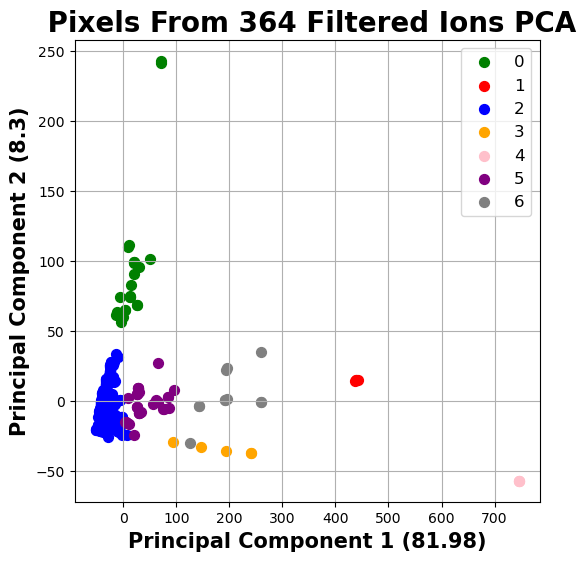

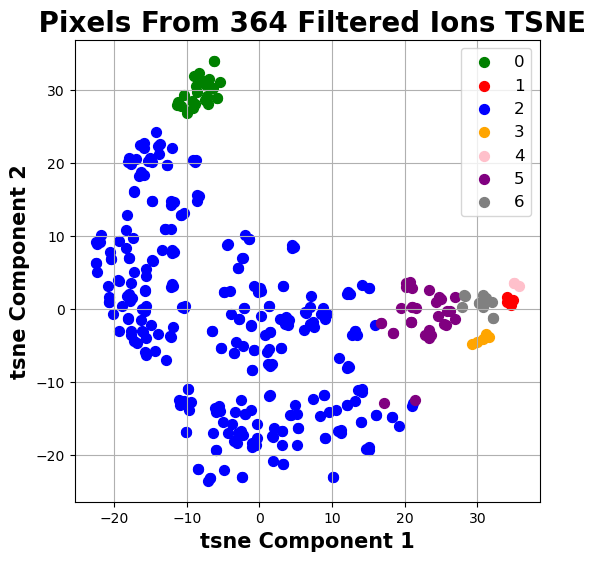

Text(0.5, 1.0, 'UMAP projection of Pixels From 364 Filtered Ions')

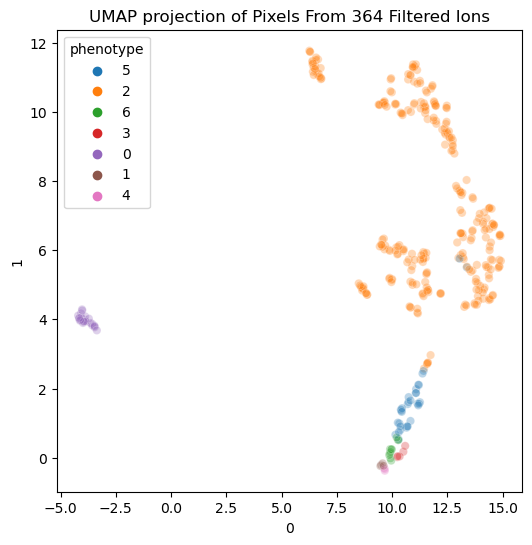

In [68]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/tg_6mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 364 Filtered Ions', fontsize=12)


Below we save the PCA for the publication without a title and with different font sizes and dimensions.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


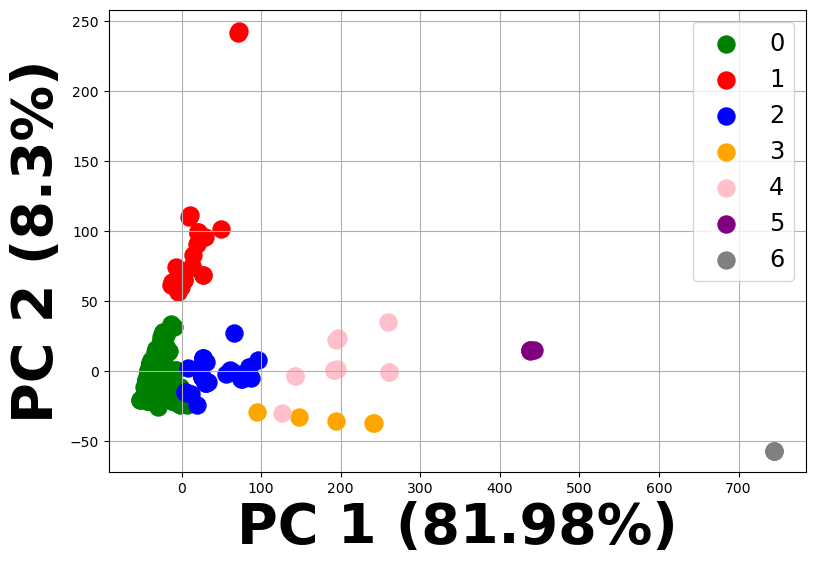

In [69]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Change cluster labels based on PCA plot above
clusterlabels_ordered_tg6 = np.select([clusterlabels == 2, clusterlabels == 0, clusterlabels == 5, clusterlabels == 3, clusterlabels == 6, clusterlabels == 1, clusterlabels == 4], [0, 1, 2, 3, 4, 5, 6], clusterlabels)


# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels_ordered_tg6
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({percent_variance[0]}%)', fontsize = 40, fontweight = 'bold')
ax.set_ylabel(f'PC 2 ({percent_variance[1]}%)', fontsize = 40, fontweight = 'bold')
#ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 150)
ax.legend(labels, fontsize = 'xx-large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/tg_6mo_ion_clustering_pca.tiff', bbox_inches = 'tight')


Below we add the labels

In [70]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels_ordered_tg6
filtered_ions_matrix_no_background_tranposed

3075    3076    3077    3078    3079    3080    3247    3248  \
790.5429   929.0   755.0  1242.0   822.0   891.0  1301.0  1626.0  1705.0   
700.5101     0.0    72.0    33.0    30.0    50.0    20.0    83.0     7.0   
331.2639   259.0    78.0   197.0   506.0   204.0   202.0   338.0   526.0   
283.2645  1667.0  2154.0  2458.0  1635.0  2420.0  2070.0  3276.0  2606.0   
892.6272     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...          ...     ...     ...     ...     ...     ...     ...     ...   
727.5385    51.0    21.0    76.0     0.0    10.0    33.0     6.0     0.0   
754.5710     0.0    44.0     0.0     0.0    32.0     0.0     0.0     0.0   
749.4791    98.0   109.0   205.0   100.0     6.0    20.0   242.0   241.0   
725.5073     0.0    29.0    81.0    26.0    29.0    39.0    89.0    32.0   
878.6012     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

            3249    3250  ...   20672   20673   20674   20675   20676   20677  \
790.5429  1347.0  1472.0  ...  1388.0  1388.0  1471.0  1738.0  1624.0  1604.0   
700.5101    25.0    30.0  ...   165.0   258.0   106.0   174.0     0.0    58.0   
331.2639   301.0   621.0  ...   347.0   555.0   286.0   935.0   405.0   833.0   
283.2645  2896.0  2960.0  ...  2816.0  3256.0  4042.0  5227.0  4871.0  5131.0   
892.6272    14.0    19.0  ...     6.0     0.0     0.0    34.0     0.0    24.0   
...          ...     ...  ...     ...     ...     ...     ...     ...     ...   
727.5385    57.0    20.0  ...   104.0   138.0    58.0    20.0    69.0    72.0   
754.5710    36.0    52.0  ...    35.0    97.0    17.0    31.0     0.0     0.0   
749.4791   268.0    61.0  ...   347.0   460.0   270.0   452.0   358.0   161.0   
725.5073    21.0    39.0  ...    58.0   165.0   155.0    87.0    89.0   106.0   
878.6012     0.0     0.0  ...    42.0    27.0    70.0    99.0    44.0    24.0   

           20678   20679   20680  labels  
790.5429  1417.0   915.0  1277.0       2  
700.5101     0.0    56.0    75.0       0  
331.2639   457.0   792.0   881.0       0  
283.2645  3243.0  5042.0  5279.0       4  
892.6272     0.0    27.0     0.0       0  
...          ...     ...     ...     ...  
727.5385    70.0    36.0   150.0       0  
754.5710     0.0     0.0    23.0       0  
749.4791    68.0   193.0   321.0       0  
725.5073   113.0   130.0   129.0       0  
878.6012     0.0     0.0     0.0       0  

[364 rows x 11606 columns]

Below we look at representative ion images from each cluster.

In [71]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['700.5101',
 '331.2639',
 '892.6272',
 '750.5383',
 '683.5000',
 '862.6077',
 '778.5598',
 '696.4663',
 '702.5150',
 '764.5199',
 '866.5098',
 '328.2209',
 '699.4625',
 '748.4763',
 '778.5695',
 '883.5342',
 '674.4731',
 '674.4833',
 '700.5087',
 '773.5332',
 '309.2800',
 '811.5315',
 '685.5149',
 '763.5109',
 '904.6193',
 '683.4808',
 '797.5317',
 '702.4857',
 '764.5082',
 '772.5316',
 '700.5089',
 '772.5276',
 '763.5107',
 '124.0071',
 '751.5354',
 '749.5209',
 '279.2104',
 '700.4909',
 '891.6346',
 '887.5582',
 '331.2636',
 '683.5007',
 '695.4318',
 '303.2328.1',
 '699.4949',
 '810.5282',
 '253.2175',
 '805.5784',
 '600.5048',
 '284.2680',
 '838.5573',
 '506.2932',
 '696.4677',
 '303.2795',
 '767.5411',
 '798.5340',
 '818.5342',
 '279.2096',
 '862.6048',
 '696.4636',
 '775.5421',
 '721.4932',
 '887.5600',
 '552.2717',
 '284.2681',
 '835.5614',
 '699.4968',
 '702.4774',
 '145.0612',
 '674.4709',
 '750.5397',
 '775.5443',
 '724.5035',
 '858.5206',
 '810.5298',
 '834.5550',
 '884.5394

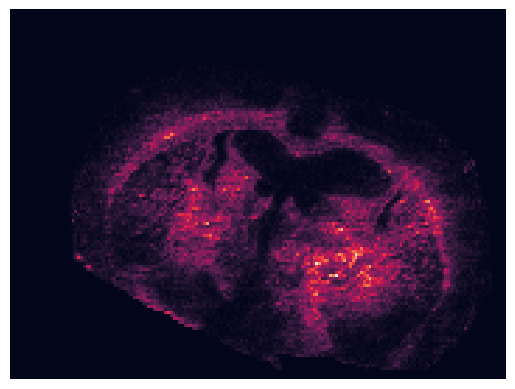

In [85]:
uniform_data_225_3tg_673_4694 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('673.4694')]
ax = sns.heatmap(uniform_data_225_3tg_673_4694, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group1_representative_image.tiff')
plt.show()

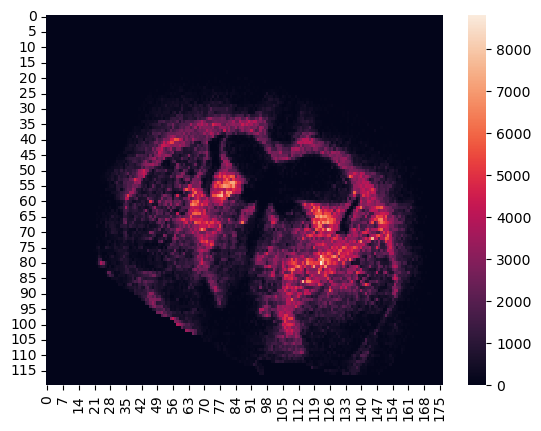

In [10]:
uniform_data_225_3tg_889_6260 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_225_3tg_889_6260)
plt.show()

In [72]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['673.4694',
 '889.6260',
 '788.5448',
 '723.4990',
 '888.6245',
 '723.4972',
 '889.6266',
 '788.5443',
 '701.5121',
 '701.4814',
 '788.5429',
 '890.6309',
 '673.4799',
 '723.4991',
 '673.4804',
 '890.6320',
 '673.4666',
 '723.4951',
 '701.5146',
 '888.6234',
 '673.4758',
 '701.5111',
 '890.6331',
 '889.6281']

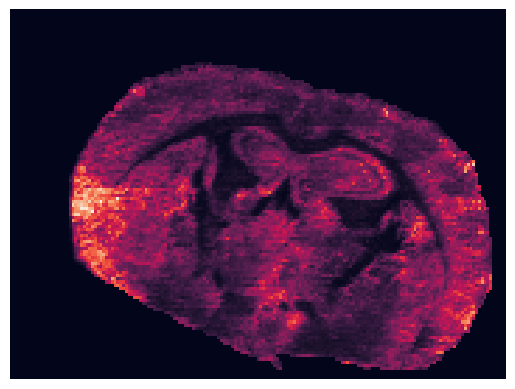

In [84]:
uniform_data_225_3tg_834_5276 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('834.5276')]
ax = sns.heatmap(uniform_data_225_3tg_834_5276, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group5_representative_image.tiff')
plt.show()

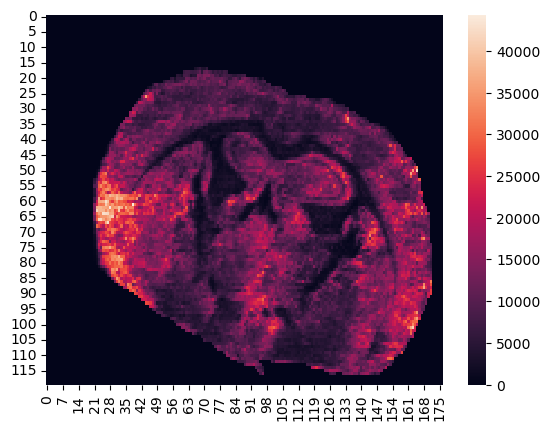

In [13]:
uniform_data_225_3tg_834_5302 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('834.5302')]
ax = sns.heatmap(uniform_data_225_3tg_834_5302)
plt.show()

In [73]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['790.5429',
 '255.2333',
 '886.5555',
 '174.0408',
 '836.5353',
 '748.5179.1',
 '774.5426',
 '774.5401',
 '886.5565',
 '836.5371',
 '282.2526',
 '791.5422',
 '766.5366',
 '766.5374',
 '746.5107',
 '746.5154',
 '790.5375',
 '790.5396',
 '328.2358',
 '747.5095',
 '791.5409',
 '748.5179',
 '836.5377',
 '747.5125',
 '766.5388',
 '774.5427',
 '766.5361',
 '886.5543',
 '748.5185',
 '747.5109',
 '836.5352',
 '748.5162']

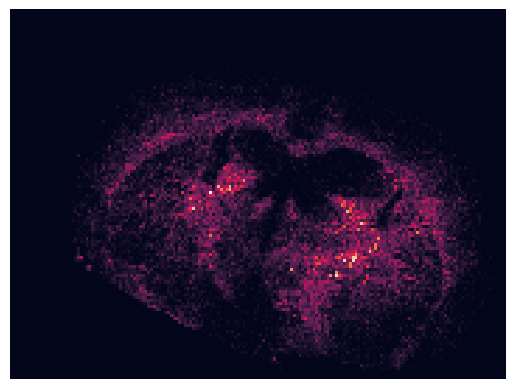

In [83]:
uniform_data_225_3tg_892_6272 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('892.6272')]
ax = sns.heatmap(uniform_data_225_3tg_892_6272, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group0_representative_image.tiff')
plt.show()

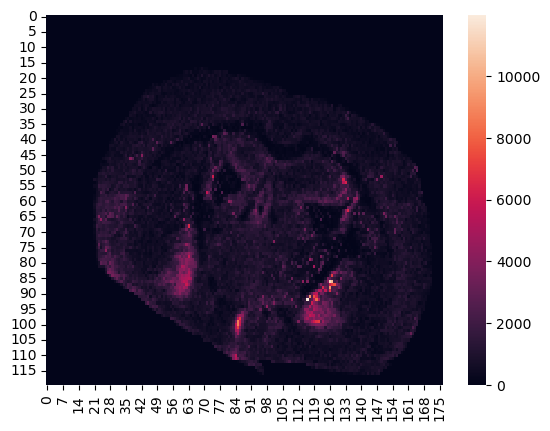

In [16]:
uniform_data_225_3tg_331_2639 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('331.2639')]
ax = sns.heatmap(uniform_data_225_3tg_331_2639)
plt.show()

In [74]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['327.2236', '327.2137', '327.2166', '327.2329', '327.2211']

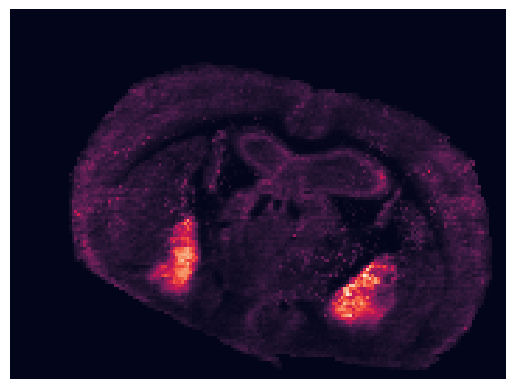

In [82]:
uniform_data_225_3tg_327_2236 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('327.2236')]
ax = sns.heatmap(uniform_data_225_3tg_327_2236, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group3_representative_image.tiff')
plt.show()

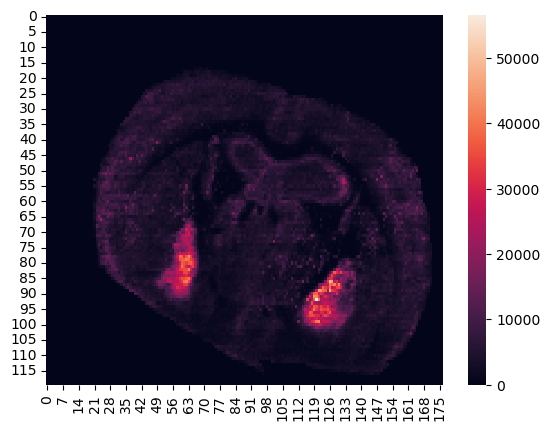

In [19]:
uniform_data_225_3tg_327_2137 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('327.2137')]
ax = sns.heatmap(uniform_data_225_3tg_327_2137)
plt.show()

In [75]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['283.2645',
 '835.5336',
 '885.5513',
 '281.2495',
 '283.2649',
 '281.2491',
 '835.5316',
 '835.5336.1',
 '885.5498',
 '304.2365',
 '885.5519']

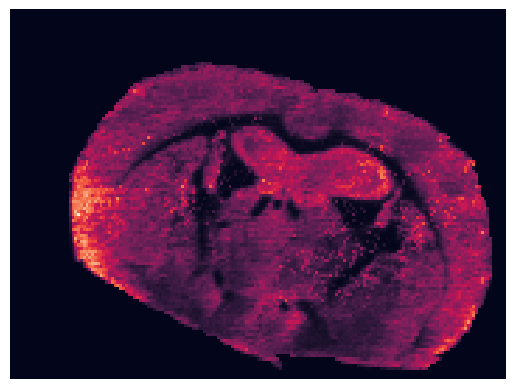

In [81]:
uniform_data_225_3tg_303_2291 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('303.2291')]
ax = sns.heatmap(uniform_data_225_3tg_303_2291, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group6_representative_image.tiff')
plt.show()

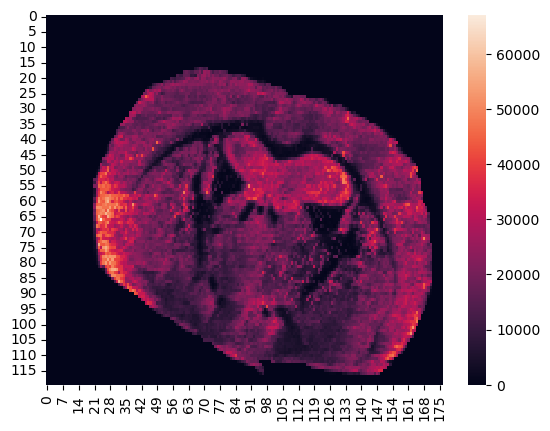

In [22]:
uniform_data_225_3tg_303_2302 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('303.2302')]
ax = sns.heatmap(uniform_data_225_3tg_303_2302)
plt.show()

In [76]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['834.5289', '834.5315', '834.5302', '834.5276']

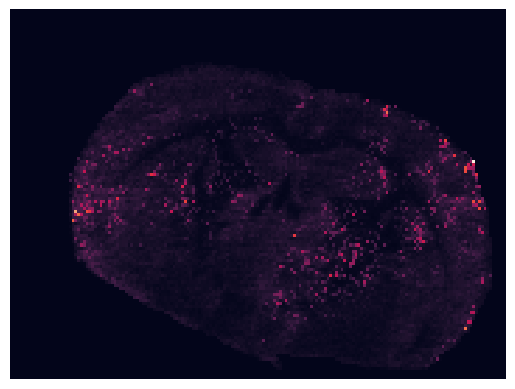

In [80]:
uniform_data_225_3tg_790_5429 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('790.5429')]
ax = sns.heatmap(uniform_data_225_3tg_790_5429, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group2_representative_image.tiff')
plt.show()

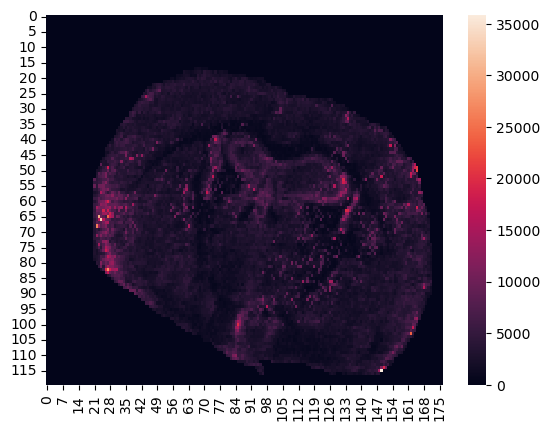

In [25]:
uniform_data_225_3tg_255_2333 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('255.2333')]
ax = sns.heatmap(uniform_data_225_3tg_255_2333)
plt.show()

In [77]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['303.2291', '303.2302', '303.2328']

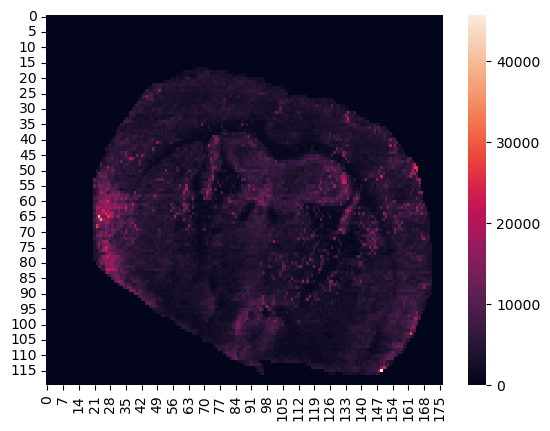

In [27]:
uniform_data_225_3tg_283_2645 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('283.2645')]
ax = sns.heatmap(uniform_data_225_3tg_283_2645)
plt.show()

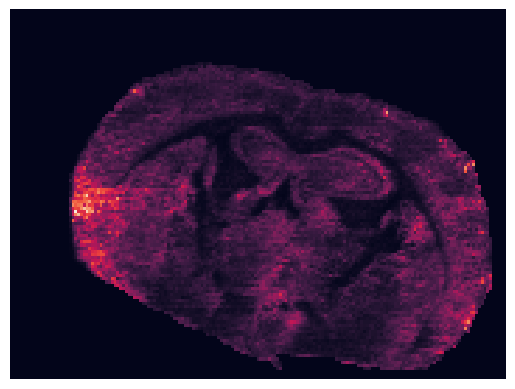

In [78]:
uniform_data_225_3tg_835_5336 = np.array(masked_metabolomics_matrix_225_3tg).T.reshape([num_metabolites_negative, len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['x_coord'] == coordinates_matrix_225_3tg.iloc[0][0]]), len(coordinates_matrix_225_3tg[coordinates_matrix_225_3tg['y_coord'] == coordinates_matrix_225_3tg.iloc[0][1]])])[masked_metabolomics_matrix_225_3tg.columns.get_loc('835.5336')]
ax = sns.heatmap(uniform_data_225_3tg_835_5336, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_6mo_group4_representative_image.tiff')
plt.show()

Below we create a dataframe for and save the ion clusters.

In [86]:
ion_clusters_tg_6mo = pd.DataFrame({'Group0': pd.Series(group0.index.tolist()), 'Group1': pd.Series(group1.index.tolist()), 
                                    'Group2': pd.Series(group2.index.tolist()), 'Group3': pd.Series(group3.index.tolist()),
                                   'Group4': pd.Series(group4.index.tolist()), 'Group5': pd.Series(group5.index.tolist()),
                                   'Group6': pd.Series(group6.index.tolist())})
ion_clusters_tg_6mo.to_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/6mo_tg_ion_pattern_clusters.csv', index = False)
ion_clusters_tg_6mo

Group0    Group1    Group2    Group3    Group4    Group5    Group6
0    700.5101  673.4694  790.5429  327.2236  283.2645  834.5289  303.2291
1    331.2639  889.6260  255.2333  327.2137  835.5336  834.5315  303.2302
2    892.6272  788.5448  886.5555  327.2166  885.5513  834.5302  303.2328
3    750.5383  723.4990  174.0408  327.2329  281.2495  834.5276       NaN
4    683.5000  888.6245  836.5353  327.2211  283.2649       NaN       NaN
..        ...       ...       ...       ...       ...       ...       ...
280  727.5385       NaN       NaN       NaN       NaN       NaN       NaN
281  754.5710       NaN       NaN       NaN       NaN       NaN       NaN
282  749.4791       NaN       NaN       NaN       NaN       NaN       NaN
283  725.5073       NaN       NaN       NaN       NaN       NaN       NaN
284  878.6012       NaN       NaN       NaN       NaN       NaN       NaN

[285 rows x 7 columns]

<a class="anchor" id="Brain_12motg"></a>
Below we import a brain for the 12 month tg.

In [87]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
masked_metabolomics_matrix_270_a1_Tg_s1 = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/270_a1_Tg_s1_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_270_a1_Tg_s1 = pd.read_csv('D:/NEW All AGE Negative TL/AL011323_AGE_270_a1_Tg_s1_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [88]:
filtered_ions_matrix = masked_metabolomics_matrix_270_a1_Tg_s1[significant_anova_ion_whole_brain['0'].tolist()]
filtered_ions_matrix_no_background = filtered_ions_matrix.loc[(filtered_ions_matrix.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

2921   2922   2923   2924   2925   2926   2927   2928   2929   \
790.5429   41.0   10.0   34.0   20.0   43.0    8.0   23.0    0.0   18.0   
700.5101    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
331.2639    0.0   20.0    0.0    0.0   30.0    0.0    0.0    0.0    0.0   
283.2645  134.0  268.0  150.0   88.0   99.0  154.0  144.0   77.0  176.0   
892.6272    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...         ...    ...    ...    ...    ...    ...    ...    ...    ...   
727.5385    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
754.5710    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
749.4791    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
725.5073    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
878.6012    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   

          2930   ...   19152   19153   19154   19155   19156   19157   19158  \
790.5429    0.0  ...  4764.0  3603.0  4435.0  3130.0  2537.0  2798.0  3060.0   
700.5101    0.0  ...     0.0    24.0    25.0    45.0    28.0    46.0    51.0   
331.2639    0.0  ...   306.0   454.0   575.0   426.0   368.0   164.0   291.0   
283.2645   83.0  ...  5080.0  5358.0  5569.0  4437.0  4023.0  4034.0  4865.0   
892.6272    0.0  ...     0.0     0.0     0.0    24.0     0.0     0.0     0.0   
...         ...  ...     ...     ...     ...     ...     ...     ...     ...   
727.5385    0.0  ...   161.0   189.0   153.0    86.0    79.0   124.0    53.0   
754.5710    0.0  ...     0.0     0.0    24.0    34.0    19.0     0.0     0.0   
749.4791    0.0  ...   218.0   184.0   169.0   168.0    36.0    62.0   180.0   
725.5073    0.0  ...    23.0   108.0    75.0    32.0    45.0    41.0    99.0   
878.6012    0.0  ...     0.0     0.0    10.0    23.0    12.0     0.0     0.0   

           19159   19160   19161  
790.5429  2674.0  2148.0  2657.0  
700.5101    93.0    76.0   181.0  
331.2639   295.0   357.0   503.0  
283.2645  4335.0  6458.0  5010.0  
892.6272    21.0     2.0     0.0  
...          ...     ...     ...  
727.5385   132.0   354.0   558.0  
754.5710     0.0     0.0    27.0  
749.4791   153.0   347.0   157.0  
725.5073   108.0   264.0   371.0  
878.6012     0.0     0.0     0.0  

[364 rows x 9258 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


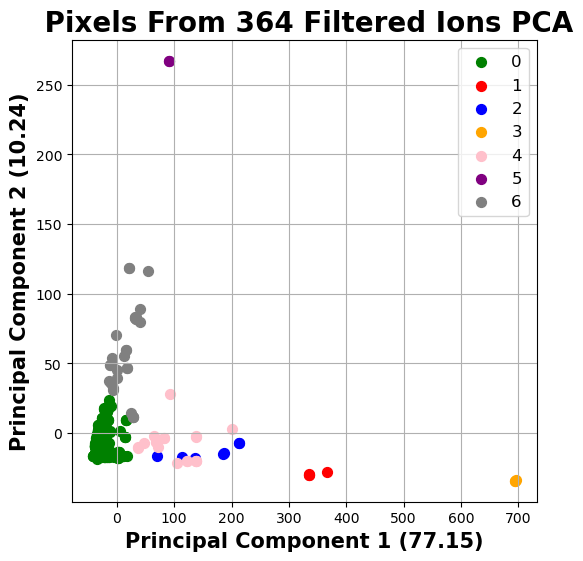

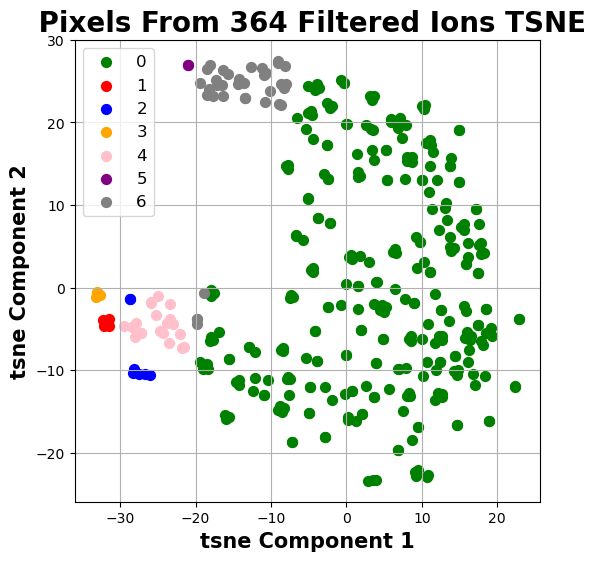

Text(0.5, 1.0, 'UMAP projection of Pixels From 364 Filtered Ions')

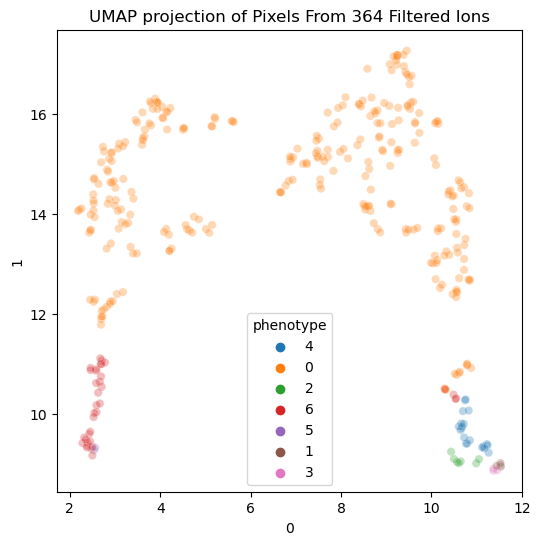

In [89]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/tg_12mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 364 Filtered Ions', fontsize=12)


Below we save the PCA for the publication without a title and with different font sizes and dimensions.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


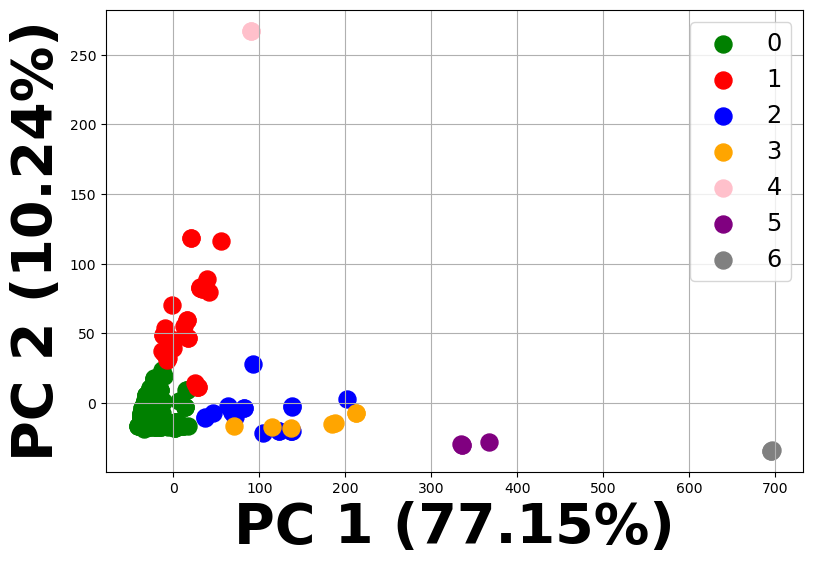

In [90]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Change cluster labels based on PCA plot above
clusterlabels_ordered_tg12 = np.select([clusterlabels == 0, clusterlabels == 6, clusterlabels == 4, clusterlabels == 2, clusterlabels == 5, clusterlabels == 1, clusterlabels == 3], [0, 1, 2, 3, 4, 5, 6], clusterlabels)


# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels_ordered_tg12
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({percent_variance[0]}%)', fontsize = 40, fontweight = 'bold')
ax.set_ylabel(f'PC 2 ({percent_variance[1]}%)', fontsize = 40, fontweight = 'bold')
#ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 150)
ax.legend(labels, fontsize = 'xx-large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/tg_12mo_ion_clustering_pca.tiff', bbox_inches = 'tight')


Below we add the labels

In [91]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels_ordered_tg12
filtered_ions_matrix_no_background_tranposed

2921   2922   2923  2924  2925   2926   2927  2928   2929  2930  \
790.5429   41.0   10.0   34.0  20.0  43.0    8.0   23.0   0.0   18.0   0.0   
700.5101    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
331.2639    0.0   20.0    0.0   0.0  30.0    0.0    0.0   0.0    0.0   0.0   
283.2645  134.0  268.0  150.0  88.0  99.0  154.0  144.0  77.0  176.0  83.0   
892.6272    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
...         ...    ...    ...   ...   ...    ...    ...   ...    ...   ...   
727.5385    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
754.5710    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
749.4791    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
725.5073    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   
878.6012    0.0    0.0    0.0   0.0   0.0    0.0    0.0   0.0    0.0   0.0   

          ...   19153   19154   19155   19156   19157   19158   19159   19160  \
790.5429  ...  3603.0  4435.0  3130.0  2537.0  2798.0  3060.0  2674.0  2148.0   
700.5101  ...    24.0    25.0    45.0    28.0    46.0    51.0    93.0    76.0   
331.2639  ...   454.0   575.0   426.0   368.0   164.0   291.0   295.0   357.0   
283.2645  ...  5358.0  5569.0  4437.0  4023.0  4034.0  4865.0  4335.0  6458.0   
892.6272  ...     0.0     0.0    24.0     0.0     0.0     0.0    21.0     2.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
727.5385  ...   189.0   153.0    86.0    79.0   124.0    53.0   132.0   354.0   
754.5710  ...     0.0    24.0    34.0    19.0     0.0     0.0     0.0     0.0   
749.4791  ...   184.0   169.0   168.0    36.0    62.0   180.0   153.0   347.0   
725.5073  ...   108.0    75.0    32.0    45.0    41.0    99.0   108.0   264.0   
878.6012  ...     0.0    10.0    23.0    12.0     0.0     0.0     0.0     0.0   

           19161  labels  
790.5429  2657.0       2  
700.5101   181.0       0  
331.2639   503.0       0  
283.2645  5010.0       2  
892.6272     0.0       0  
...          ...     ...  
727.5385   558.0       0  
754.5710    27.0       0  
749.4791   157.0       0  
725.5073   371.0       0  
878.6012     0.0       0  

[364 rows x 9259 columns]

Below we look at representative ion images from each cluster.

In [92]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['700.5101',
 '331.2639',
 '892.6272',
 '750.5383',
 '683.5000',
 '862.6077',
 '778.5598',
 '696.4663',
 '702.5150',
 '764.5199',
 '866.5098',
 '328.2209',
 '699.4625',
 '748.4763',
 '778.5695',
 '883.5342',
 '674.4731',
 '674.4833',
 '700.5087',
 '773.5332',
 '309.2800',
 '811.5315',
 '685.5149',
 '763.5109',
 '904.6193',
 '683.4808',
 '797.5317',
 '702.4857',
 '764.5082',
 '772.5316',
 '700.5089',
 '772.5276',
 '836.5353',
 '763.5107',
 '124.0071',
 '751.5354',
 '749.5209',
 '279.2104',
 '700.4909',
 '891.6346',
 '887.5582',
 '331.2636',
 '774.5426',
 '683.5007',
 '695.4318',
 '303.2328.1',
 '699.4949',
 '810.5282',
 '253.2175',
 '805.5784',
 '600.5048',
 '284.2680',
 '838.5573',
 '506.2932',
 '696.4677',
 '774.5401',
 '303.2795',
 '767.5411',
 '798.5340',
 '818.5342',
 '279.2096',
 '862.6048',
 '696.4636',
 '775.5421',
 '721.4932',
 '887.5600',
 '552.2717',
 '284.2681',
 '835.5614',
 '699.4968',
 '702.4774',
 '145.0612',
 '674.4709',
 '750.5397',
 '775.5443',
 '724.5035',
 '858.5206

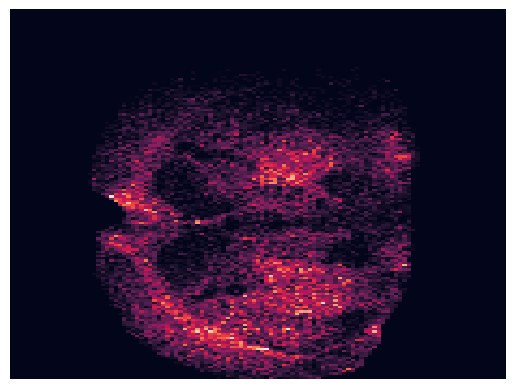

In [100]:
uniform_data_270_a1_Tg_s1_700_5101 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('700.5101')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_700_5101, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group0_representative_image.tiff')
plt.show()

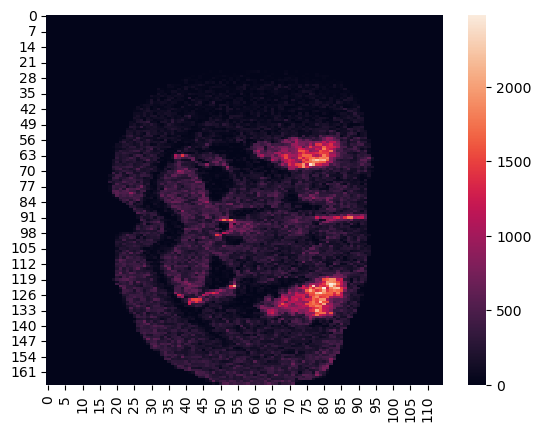

In [36]:
uniform_data_270_a1_Tg_s1_331_2639 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('331.2639')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_331_2639)
plt.show()

In [93]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['673.4694',
 '889.6260',
 '788.5448',
 '748.5179.1',
 '723.4990',
 '723.4972',
 '889.6266',
 '788.5443',
 '724.5005',
 '723.4623',
 '701.5121',
 '701.4814',
 '788.5429',
 '890.6309',
 '673.4799',
 '695.4645',
 '748.5179',
 '723.4991',
 '726.5419',
 '673.4804',
 '890.6320',
 '673.4666',
 '723.4951',
 '701.5146',
 '695.4633',
 '766.5361',
 '695.4635',
 '724.4932',
 '673.4758',
 '726.5410',
 '701.5111',
 '890.6331',
 '726.5406',
 '889.6281',
 '748.5162']

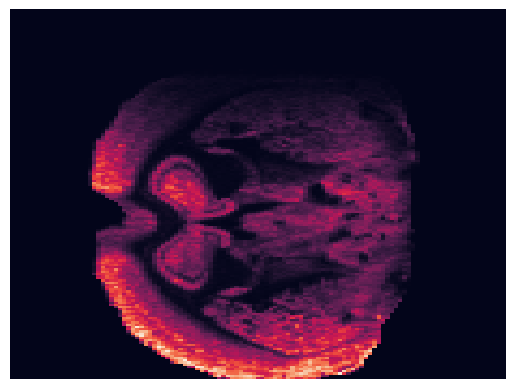

In [101]:
uniform_data_270_a1_Tg_s1_834_5276 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('834.5276')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_834_5276, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group5_representative_image.tiff')
plt.show()

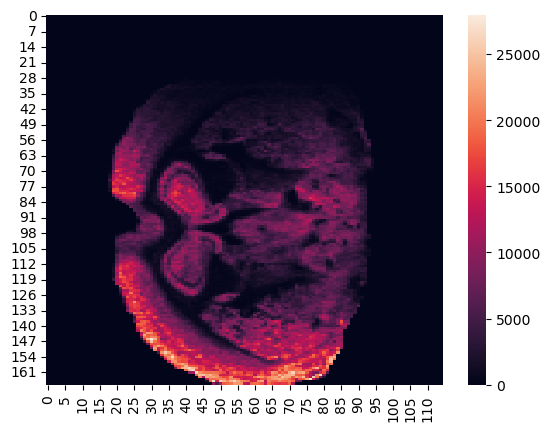

In [39]:
uniform_data_270_a1_Tg_s1_834_5302 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('834.5302')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_834_5302)
plt.show()

In [94]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['790.5429',
 '283.2645',
 '255.2333',
 '886.5555',
 '174.0408',
 '835.5336',
 '885.5513',
 '886.5565',
 '283.2649',
 '790.5375',
 '790.5396',
 '835.5316',
 '747.5095',
 '835.5336.1',
 '885.5498',
 '747.5125',
 '886.5543',
 '304.2365',
 '885.5519',
 '747.5109']

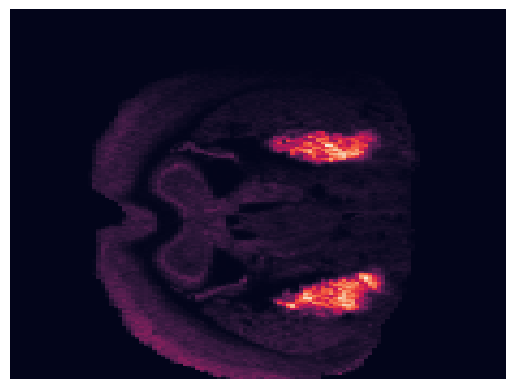

In [102]:
uniform_data_270_a1_Tg_s1_327_2236 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('327.2236')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_327_2236, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group3_representative_image.tiff')
plt.show()

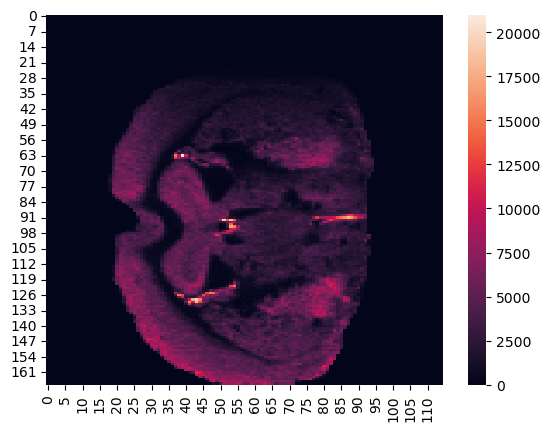

In [42]:
uniform_data_270_a1_Tg_s1_281_2495 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('281.2495')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_281_2495)
plt.show()

In [95]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['327.2236',
 '327.2137',
 '281.2495',
 '327.2166',
 '281.2491',
 '327.2329',
 '327.2211']

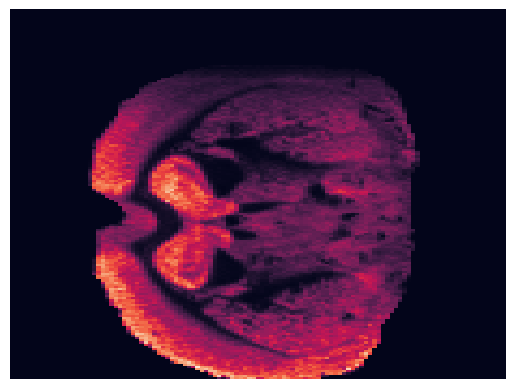

In [103]:
uniform_data_270_a1_Tg_s1_303_2291 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('303.2291')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_303_2291, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group6_representative_image.tiff')
plt.show()

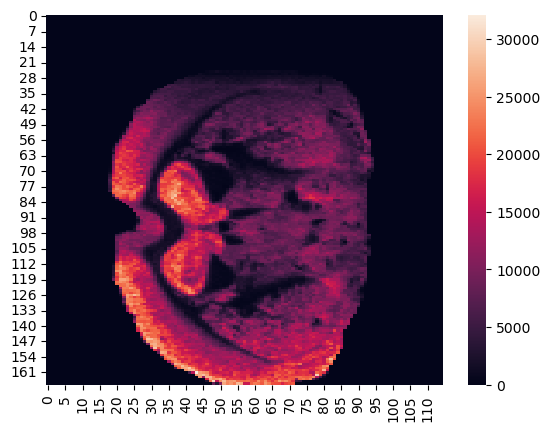

In [45]:
uniform_data_270_a1_Tg_s1_303_2302 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('303.2302')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_303_2302)
plt.show()

In [96]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['888.6245', '888.6234']

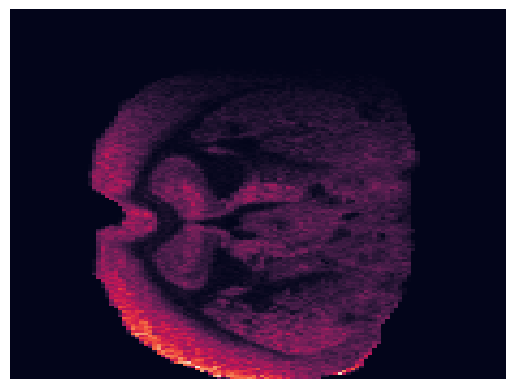

In [104]:
uniform_data_270_a1_Tg_s1_790_5429 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('790.5429')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_790_5429, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group2_representative_image.tiff')
plt.show()

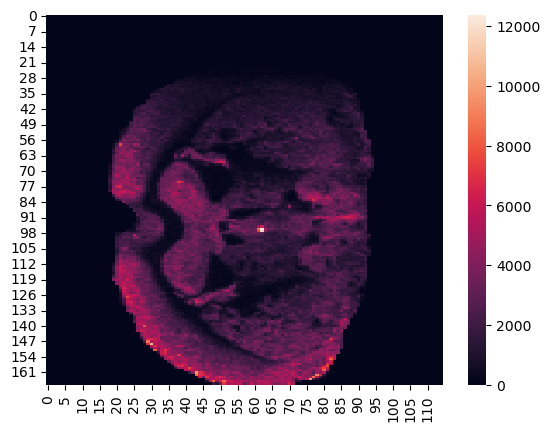

In [48]:
uniform_data_270_a1_Tg_s1_283_2645 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('283.2645')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_283_2645)
plt.show()

In [97]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['834.5289', '834.5315', '834.5302', '834.5276']

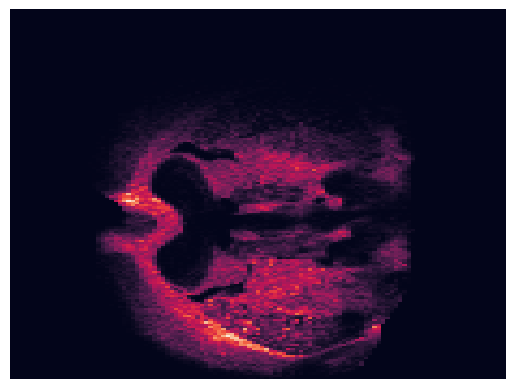

In [105]:
uniform_data_270_a1_Tg_s1_888_6234 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('888.6234')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_888_6234, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group4_representative_image.tiff')
plt.show()

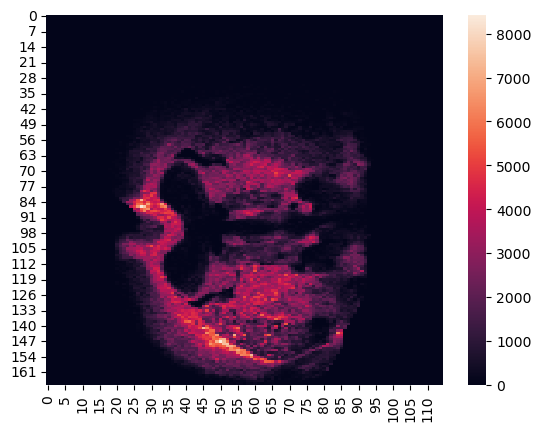

In [51]:
uniform_data_270_a1_Tg_s1_888_6245 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('888.6245')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_888_6245)
plt.show()

In [98]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['303.2291', '303.2302', '303.2328']

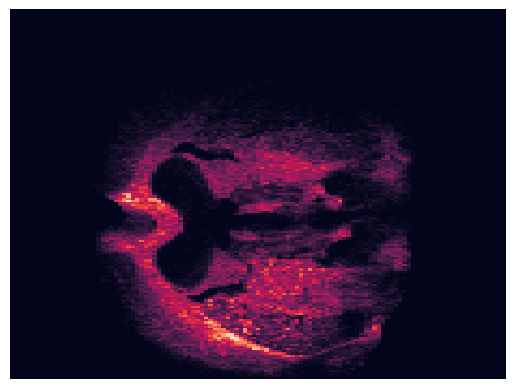

In [106]:
uniform_data_270_a1_Tg_s1_889_6260 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_889_6260, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_12mo_group1_representative_image.tiff')
plt.show()

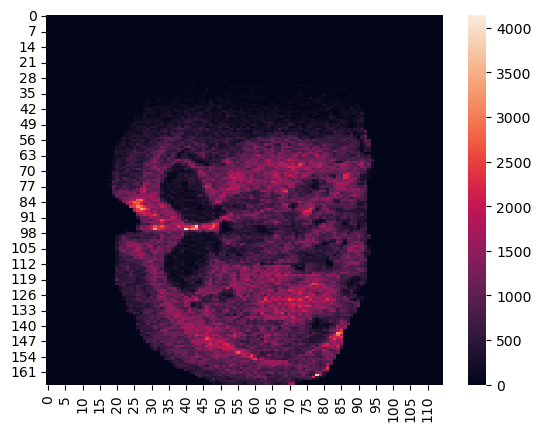

In [54]:
uniform_data_270_a1_Tg_s1_723_4991 = np.array(masked_metabolomics_matrix_270_a1_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['x_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][0]]), len(coordinates_matrix_270_a1_Tg_s1[coordinates_matrix_270_a1_Tg_s1['y_coord'] == coordinates_matrix_270_a1_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_270_a1_Tg_s1.columns.get_loc('723.4991')]
ax = sns.heatmap(uniform_data_270_a1_Tg_s1_723_4991)
plt.show()

Below we create a dataframe for and save the ion clusters.

In [99]:
ion_clusters_tg_12mo = pd.DataFrame({'Group0': pd.Series(group0.index.tolist()), 'Group1': pd.Series(group1.index.tolist()), 
                                    'Group2': pd.Series(group2.index.tolist()), 'Group3': pd.Series(group3.index.tolist()),
                                   'Group4': pd.Series(group4.index.tolist()), 'Group5': pd.Series(group5.index.tolist()),
                                   'Group6': pd.Series(group6.index.tolist())})
ion_clusters_tg_12mo.to_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/12mo_tg_ion_pattern_clusters.csv', index = False)
ion_clusters_tg_12mo

Group0      Group1    Group2    Group3    Group4    Group5    Group6
0    700.5101    673.4694  790.5429  327.2236  888.6245  834.5289  303.2291
1    331.2639    889.6260  283.2645  327.2137  888.6234  834.5315  303.2302
2    892.6272    788.5448  255.2333  281.2495       NaN  834.5302  303.2328
3    750.5383  748.5179.1  886.5555  327.2166       NaN  834.5276       NaN
4    683.5000    723.4990  174.0408  281.2491       NaN       NaN       NaN
..        ...         ...       ...       ...       ...       ...       ...
288  727.5385         NaN       NaN       NaN       NaN       NaN       NaN
289  754.5710         NaN       NaN       NaN       NaN       NaN       NaN
290  749.4791         NaN       NaN       NaN       NaN       NaN       NaN
291  725.5073         NaN       NaN       NaN       NaN       NaN       NaN
292  878.6012         NaN       NaN       NaN       NaN       NaN       NaN

[293 rows x 7 columns]

<a class="anchor" id="Brain_22motg"></a>
Below we import a brain for the 22 month tg.

In [107]:
num_metabolites_negative = 10362
# Import metabolomics matrix only
masked_metabolomics_matrix_249_4_Tg_s1 = pd.read_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/249_4_Tg_s1_pixel_matrix_with_mask_whole_brain.csv', index_col = 0)
# Read in coordinates for metabolomics matrix
coordinates_matrix_249_4_Tg_s1 = pd.read_csv('D:/NEW All AGE Negative TL/AL010323_AGE_249_4_Tg_s1_neg on DESI HDMS_TLall.txt', sep = '\t', usecols = [i for i in range(1,3)], skiprows = 5, names = ['x_coord', 'y_coord'])

Below we keep only the filtered ions.

In [108]:
filtered_ions_matrix = masked_metabolomics_matrix_249_4_Tg_s1[significant_anova_ion_whole_brain['0'].tolist()]
filtered_ions_matrix_no_background = filtered_ions_matrix.loc[(filtered_ions_matrix.sum(axis=1) != 0), :]
filtered_ions_matrix_no_background_tranposed = filtered_ions_matrix_no_background.T
filtered_ions_matrix_no_background_tranposed

2406    2407    2408     2409     2410    2411    2412    2413   \
790.5429   308.0  2672.0  6911.0   5962.0   7510.0  1267.0   730.0   691.0   
700.5101   164.0   822.0   204.0   1758.0    956.0    23.0   114.0   128.0   
331.2639   108.0   509.0   608.0   1177.0   1098.0   129.0   176.0   538.0   
283.2645  6269.0  8064.0  9442.0  18448.0  17626.0  2350.0  2226.0  3399.0   
892.6272    30.0     0.0     0.0      0.0      0.0     0.0    28.0     0.0   
...          ...     ...     ...      ...      ...     ...     ...     ...   
727.5385   218.0  2129.0  2093.0   4712.0   2850.0    97.0    72.0  1136.0   
754.5710     2.0   184.0    45.0    105.0    124.0    31.0     0.0     0.0   
749.4791   187.0  1537.0   820.0   1513.0   1380.0   199.0   134.0   320.0   
725.5073   298.0  1881.0  1089.0   4338.0   2090.0    70.0   190.0   405.0   
878.6012     0.0     6.0     0.0    105.0     17.0    19.0    25.0     0.0   

           2414    2415   ...    19226    19227   19332   19333    19334  \
790.5429  2329.0  4707.0  ...   7733.0   2131.0   785.0  1015.0    829.0   
700.5101   489.0   653.0  ...    420.0    428.0   127.0   139.0      0.0   
331.2639   704.0   340.0  ...    487.0    213.0    87.0    83.0     83.0   
283.2645  5650.0  7656.0  ...  12632.0  11994.0  9144.0  9921.0  10081.0   
892.6272     0.0    45.0  ...      2.0     34.0    20.0     0.0     43.0   
...          ...     ...  ...      ...      ...     ...     ...      ...   
727.5385  1960.0  1891.0  ...    899.0    400.0   317.0   310.0    171.0   
754.5710    48.0    26.0  ...     77.0     42.0     0.0    22.0      0.0   
749.4791   919.0  1199.0  ...    556.0    402.0     4.0   153.0    149.0   
725.5073  1164.0  1008.0  ...    751.0    585.0   121.0   208.0    126.0   
878.6012    20.0    31.0  ...     50.0      0.0    10.0     4.0      0.0   

           19335    19336    19337   19338    19339  
790.5429   722.0    703.0    635.0   541.0    350.0  
700.5101   157.0     45.0      0.0    20.0      0.0  
331.2639    43.0     35.0      0.0    20.0      0.0  
283.2645  9174.0  10574.0  10099.0  9426.0  10104.0  
892.6272     0.0     78.0     56.0    33.0     48.0  
...          ...      ...      ...     ...      ...  
727.5385    40.0     64.0     22.0    40.0     21.0  
754.5710     0.0      0.0      0.0     0.0      0.0  
749.4791   126.0     44.0    104.0    74.0     71.0  
725.5073    52.0     69.0     21.0     0.0     53.0  
878.6012     0.0      0.0      0.0    20.0      0.0  

[364 rows x 8569 columns]

Below we run kmeans on the pixels to find general patterns with 7 groups because that is what we saw in HDI.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


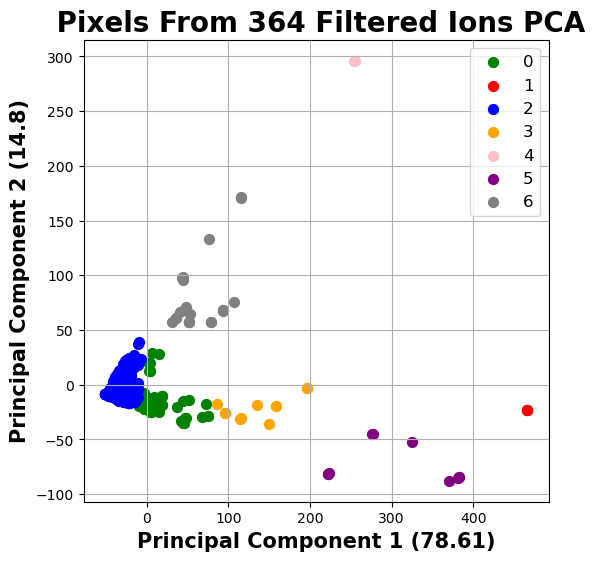

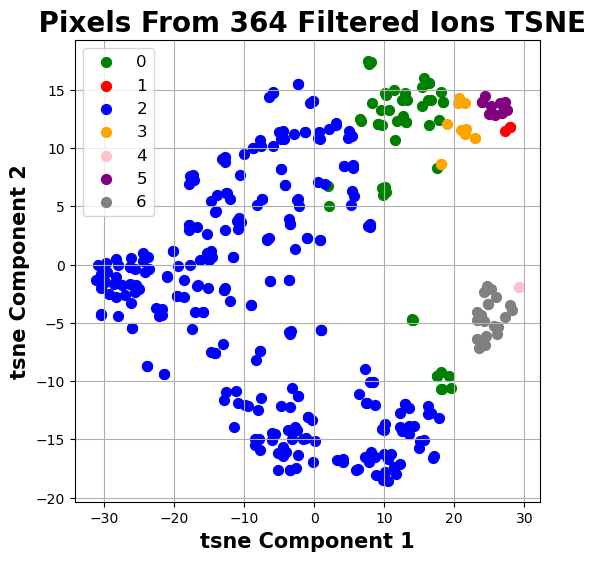

Text(0.5, 1.0, 'UMAP projection of Pixels From 364 Filtered Ions')

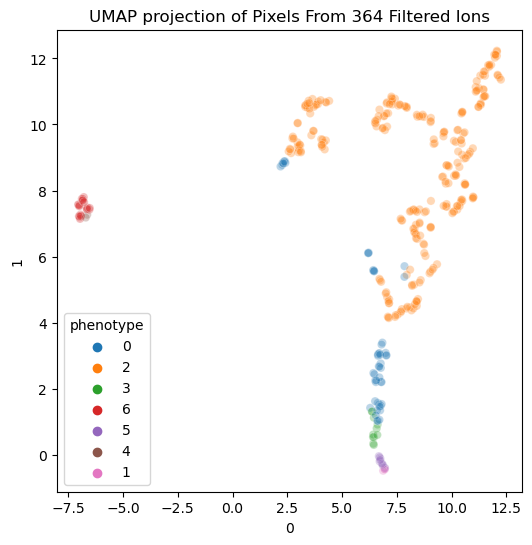

In [109]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'Principal Component 1 ({percent_variance[0]})', fontsize = 15, fontweight = 'bold')
ax.set_ylabel(f'Principal Component 2 ({percent_variance[1]})', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 50)
ax.legend(labels, fontsize = 'large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/tg_22mo_ion_clustering_pca.tiff')
plt.show()


tsne = TSNE(n_components=2, random_state = 100)
tsne_components = tsne.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
principalDf = pd.DataFrame(data = tsne_components, columns = ['tsne component 1', 'tsne component 2'])
principalDf['phenotype'] = clusterlabels
fig = plt.figure(figsize = (6, 6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('tsne Component 1', fontsize = 15, fontweight = 'bold')
ax.set_ylabel('tsne Component 2', fontsize = 15, fontweight = 'bold')
ax.set_title(' Pixels From 364 Filtered Ions TSNE', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf['phenotype'] == group
    ax.scatter(principalDf.loc[indicesToKeep, 'tsne component 1']
               , principalDf.loc[indicesToKeep, 'tsne component 2'] 
               , c = color
               , s = 50, alpha = 1)
ax.legend(labels, fontsize = 'large')
# Scatter 301
#plt.scatter(3.936206, 2.881305, color = 'black')
ax.grid()
plt.show()

plt.figure(figsize = (6, 6))
reducer = umap.UMAP()
embedding = reducer.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
embedding_df = pd.DataFrame(embedding)
embedding_df['phenotype'] = clusterlabels
embedding_df['phenotype'] = embedding_df['phenotype'].replace({0 : '0', 1 : '1', 2 : '2', 3 : '3', 4: '4', 5: '5', 6 : '6'})

sns.scatterplot(data = embedding_df, hue = 'phenotype', x = 0, y = 1, alpha = 0.3)
plt.title('UMAP projection of Pixels From 364 Filtered Ions', fontsize=12)


Below we save the PCA for the publication without a title and with different font sizes and dimensions.

C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Waters\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


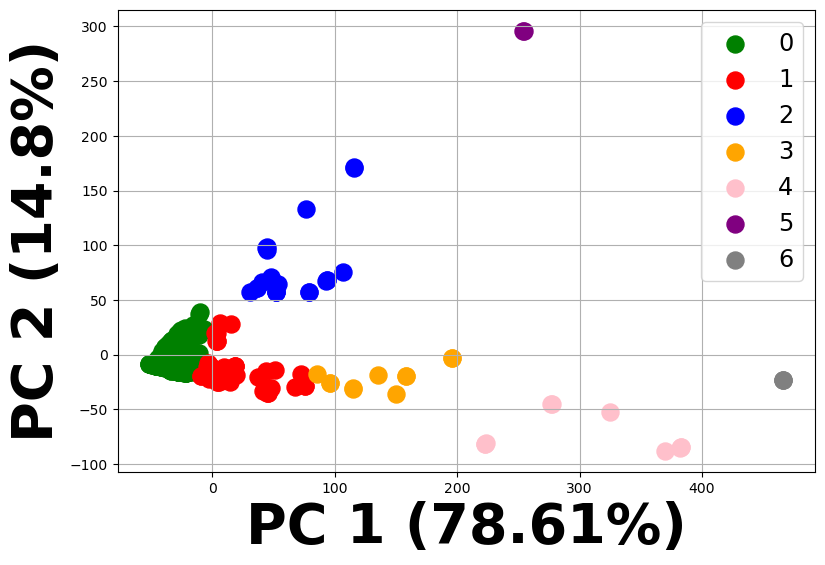

In [110]:
# Standardize data
filtered_ions_matrix_no_background_tranposed_standardized = StandardScaler().fit_transform(filtered_ions_matrix_no_background_tranposed)

kmeans = KMeans(n_clusters=7, 
                    random_state=1)
kmeans.fit(filtered_ions_matrix_no_background_tranposed_standardized)
number_of_clusters = 7
clusterlabels = kmeans.labels_

# Change cluster labels based on PCA plot above
clusterlabels_ordered_tg22 = np.select([clusterlabels == 2, clusterlabels == 0, clusterlabels == 6, clusterlabels == 3, clusterlabels == 5, clusterlabels == 4, clusterlabels == 1], [0, 1, 2, 3, 4, 5, 6], clusterlabels)

# Specify plot type
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(filtered_ions_matrix_no_background_tranposed_standardized)
percent_variance = np.round(pca.explained_variance_ratio_* 100, decimals =2)
principalDf_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
principalDf_pca['phenotype'] = clusterlabels_ordered_tg22
fig = plt.figure(figsize = (9,6))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel(f'PC 1 ({percent_variance[0]}%)', fontsize = 40, fontweight = 'bold')
ax.set_ylabel(f'PC 2 ({percent_variance[1]}%)', fontsize = 40, fontweight = 'bold')
#ax.set_title(' Pixels From 364 Filtered Ions PCA', fontsize = 20, fontweight = 'bold')
labels = list(range(number_of_clusters))
group_numbers = list(range(number_of_clusters))
colors = ['green', 'red', 'blue', 'orange', 'pink', 'purple', 'gray']
for group, color in zip(group_numbers,colors):
    indicesToKeep = principalDf_pca['phenotype'] == group
    ax.scatter(principalDf_pca.loc[indicesToKeep, 'principal component 1']
               , principalDf_pca.loc[indicesToKeep, 'principal component 2'] 
               , c = color
               , s = 150)
ax.legend(labels, fontsize = 'xx-large')
ax.grid()
plt.savefig('Images For Paper/Negative Ion Patterns/tg_22mo_ion_clustering_pca.tiff', bbox_inches = 'tight')


Below we add the labels

In [111]:
filtered_ions_matrix_no_background_tranposed['labels'] = clusterlabels_ordered_tg22
filtered_ions_matrix_no_background_tranposed

2406    2407    2408     2409     2410    2411    2412    2413  \
790.5429   308.0  2672.0  6911.0   5962.0   7510.0  1267.0   730.0   691.0   
700.5101   164.0   822.0   204.0   1758.0    956.0    23.0   114.0   128.0   
331.2639   108.0   509.0   608.0   1177.0   1098.0   129.0   176.0   538.0   
283.2645  6269.0  8064.0  9442.0  18448.0  17626.0  2350.0  2226.0  3399.0   
892.6272    30.0     0.0     0.0      0.0      0.0     0.0    28.0     0.0   
...          ...     ...     ...      ...      ...     ...     ...     ...   
727.5385   218.0  2129.0  2093.0   4712.0   2850.0    97.0    72.0  1136.0   
754.5710     2.0   184.0    45.0    105.0    124.0    31.0     0.0     0.0   
749.4791   187.0  1537.0   820.0   1513.0   1380.0   199.0   134.0   320.0   
725.5073   298.0  1881.0  1089.0   4338.0   2090.0    70.0   190.0   405.0   
878.6012     0.0     6.0     0.0    105.0     17.0    19.0    25.0     0.0   

            2414    2415  ...    19227   19332   19333    19334   19335  \
790.5429  2329.0  4707.0  ...   2131.0   785.0  1015.0    829.0   722.0   
700.5101   489.0   653.0  ...    428.0   127.0   139.0      0.0   157.0   
331.2639   704.0   340.0  ...    213.0    87.0    83.0     83.0    43.0   
283.2645  5650.0  7656.0  ...  11994.0  9144.0  9921.0  10081.0  9174.0   
892.6272     0.0    45.0  ...     34.0    20.0     0.0     43.0     0.0   
...          ...     ...  ...      ...     ...     ...      ...     ...   
727.5385  1960.0  1891.0  ...    400.0   317.0   310.0    171.0    40.0   
754.5710    48.0    26.0  ...     42.0     0.0    22.0      0.0     0.0   
749.4791   919.0  1199.0  ...    402.0     4.0   153.0    149.0   126.0   
725.5073  1164.0  1008.0  ...    585.0   121.0   208.0    126.0    52.0   
878.6012    20.0    31.0  ...      0.0    10.0     4.0      0.0     0.0   

            19336    19337   19338    19339  labels  
790.5429    703.0    635.0   541.0    350.0       1  
700.5101     45.0      0.0    20.0      0.0       0  
331.2639     35.0      0.0    20.0      0.0       0  
283.2645  10574.0  10099.0  9426.0  10104.0       3  
892.6272     78.0     56.0    33.0     48.0       0  
...           ...      ...     ...      ...     ...  
727.5385     64.0     22.0    40.0     21.0       0  
754.5710      0.0      0.0     0.0      0.0       0  
749.4791     44.0    104.0    74.0     71.0       0  
725.5073     69.0     21.0     0.0     53.0       0  
878.6012      0.0      0.0    20.0      0.0       0  

[364 rows x 8570 columns]

Below we look at representative ion images from each cluster.

In [112]:
group0 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 0]
group0.index.tolist()

['700.5101',
 '331.2639',
 '892.6272',
 '750.5383',
 '683.5000',
 '862.6077',
 '778.5598',
 '696.4663',
 '764.5199',
 '866.5098',
 '328.2209',
 '699.4625',
 '748.4763',
 '778.5695',
 '674.4731',
 '674.4833',
 '700.5087',
 '773.5332',
 '309.2800',
 '811.5315',
 '685.5149',
 '763.5109',
 '904.6193',
 '683.4808',
 '797.5317',
 '702.4857',
 '764.5082',
 '772.5316',
 '700.5089',
 '772.5276',
 '763.5107',
 '124.0071',
 '751.5354',
 '749.5209',
 '279.2104',
 '700.4909',
 '891.6346',
 '331.2636',
 '683.5007',
 '695.4318',
 '303.2328.1',
 '699.4949',
 '253.2175',
 '805.5784',
 '600.5048',
 '284.2680',
 '838.5573',
 '506.2932',
 '696.4677',
 '303.2795',
 '767.5411',
 '798.5340',
 '818.5342',
 '279.2096',
 '862.6048',
 '696.4636',
 '775.5421',
 '721.4932',
 '552.2717',
 '284.2681',
 '835.5614',
 '699.4968',
 '702.4774',
 '145.0612',
 '674.4709',
 '750.5397',
 '775.5443',
 '724.5035',
 '858.5206',
 '884.5394',
 '674.4805',
 '306.0762',
 '723.4531',
 '762.5069',
 '721.4966',
 '806.5389',
 '764.5184

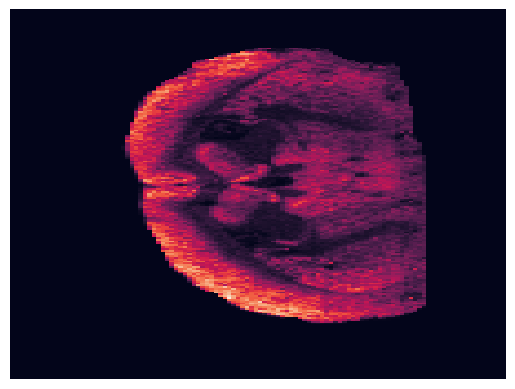

In [70]:
uniform_data_249_4_Tg_s1_790_5429 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('790.5429')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_790_5429, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group1_representative_image.tiff')
plt.show()

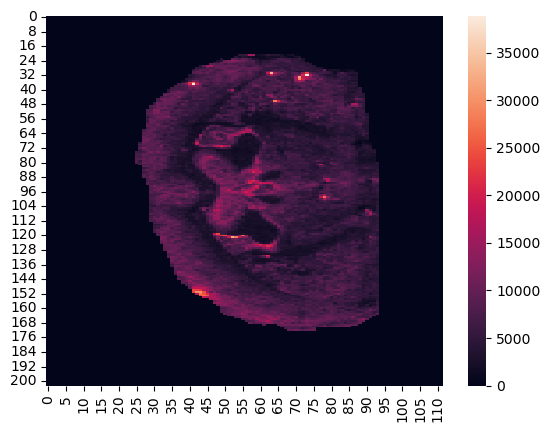

In [62]:
uniform_data_249_4_Tg_s1_255_2333 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('255.2333')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_255_2333)
plt.show()

In [113]:
group1 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 1]
group1.index.tolist()

['790.5429',
 '255.2333',
 '702.5150',
 '883.5342',
 '174.0408',
 '836.5353',
 '748.5179.1',
 '887.5582',
 '774.5426',
 '810.5282',
 '774.5401',
 '887.5600',
 '810.5298',
 '834.5550',
 '836.5371',
 '282.2526',
 '865.5027',
 '865.5038',
 '791.5422',
 '766.5366',
 '766.5374',
 '883.5327',
 '857.5198',
 '701.4814',
 '790.5375',
 '790.5396',
 '328.2358',
 '747.5095',
 '791.5409',
 '748.5179',
 '836.5377',
 '857.5178',
 '789.5480',
 '789.5463',
 '747.5125',
 '766.5388',
 '774.5427',
 '865.5060',
 '766.5361',
 '883.5340',
 '789.5474',
 '810.5292',
 '702.5179',
 '304.2365',
 '748.5185',
 '857.5205',
 '702.5128',
 '327.2211',
 '747.5109',
 '836.5352',
 '748.5162']

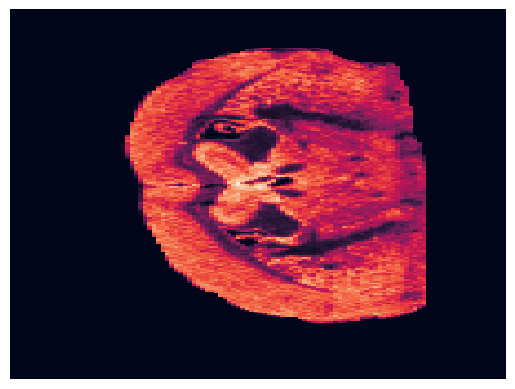

In [69]:
uniform_data_249_4_Tg_s1_303_2291 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('303.2291')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_303_2291, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group6_representative_image.tiff')
plt.show()

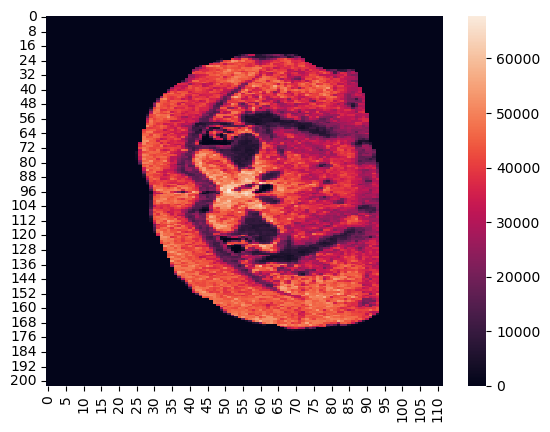

In [65]:
uniform_data_249_4_Tg_s1_303_2302 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('303.2302')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_303_2302)
plt.show()

In [114]:
group2 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 2]
group2.index.tolist()

['673.4694',
 '889.6260',
 '788.5448',
 '723.4990',
 '723.4972',
 '889.6266',
 '788.5443',
 '701.5121',
 '788.5429',
 '890.6309',
 '673.4799',
 '723.4991',
 '673.4804',
 '890.6320',
 '673.4666',
 '723.4951',
 '701.5146',
 '673.4758',
 '701.5111',
 '890.6331',
 '889.6281']

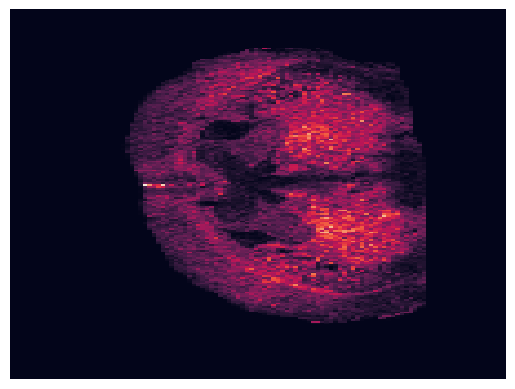

In [68]:
uniform_data_249_4_Tg_s1_700_5101 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('700.5101')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_700_5101, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group0_representative_image.tiff')
plt.show()

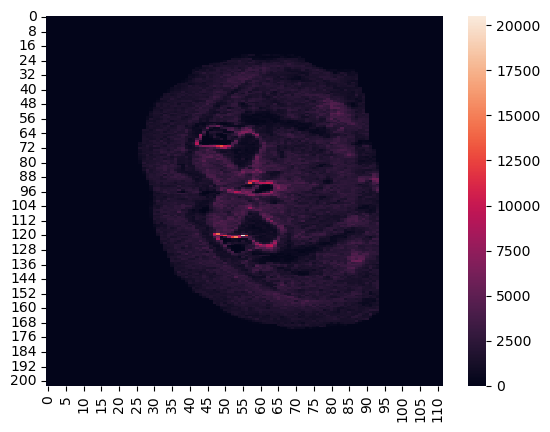

In [68]:
uniform_data_249_4_Tg_s1_331_2639 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('331.2639')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_331_2639)
plt.show()

In [115]:
group3 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 3]
group3.index.tolist()

['283.2645',
 '886.5555',
 '327.2236',
 '327.2137',
 '886.5565',
 '281.2495',
 '327.2166',
 '283.2649',
 '281.2491',
 '327.2329',
 '886.5543']

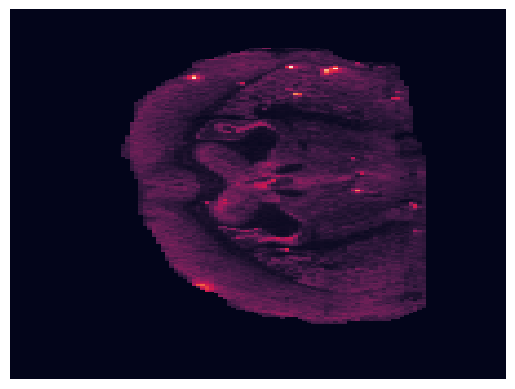

In [67]:
uniform_data_249_4_Tg_s1_283_2645 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('283.2645')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_283_2645, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group3_representative_image.tiff')
plt.show()

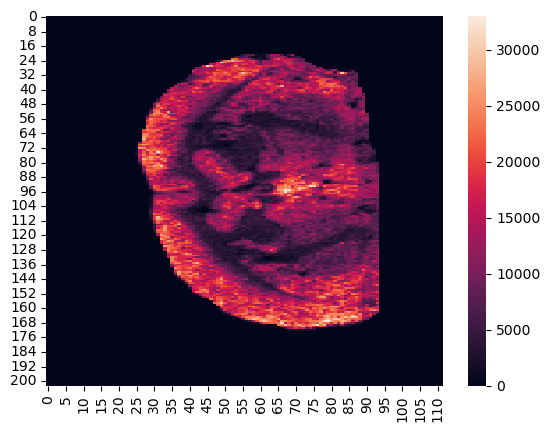

In [71]:
uniform_data_249_4_Tg_s1_886_5555 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('886.5555')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_886_5555)
plt.show()

In [116]:
group4 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 4]
group4.index.tolist()

['835.5336',
 '885.5513',
 '834.5289',
 '834.5315',
 '834.5302',
 '835.5316',
 '835.5336.1',
 '834.5276',
 '885.5498',
 '885.5519']

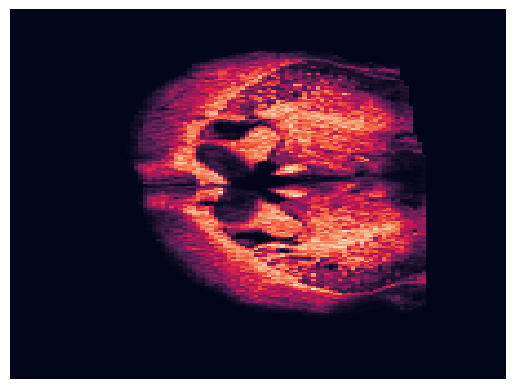

In [66]:
uniform_data_249_4_Tg_s1_888_6245 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('888.6245')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_888_6245, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group5_representative_image.tiff')
plt.show()

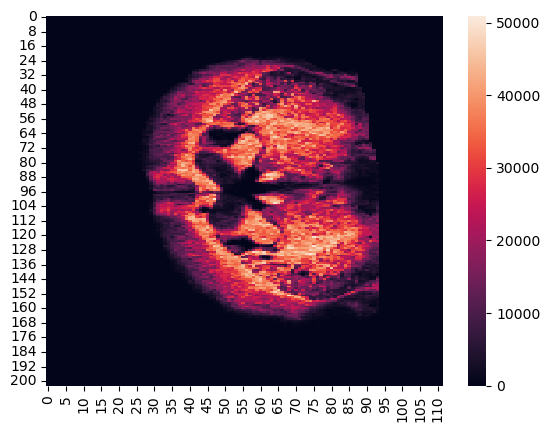

In [74]:
uniform_data_249_4_Tg_s1_888_6234 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('888.6234')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_888_6234)
plt.show()

In [117]:
group5 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 5]
group5.index.tolist()

['888.6245', '888.6234']

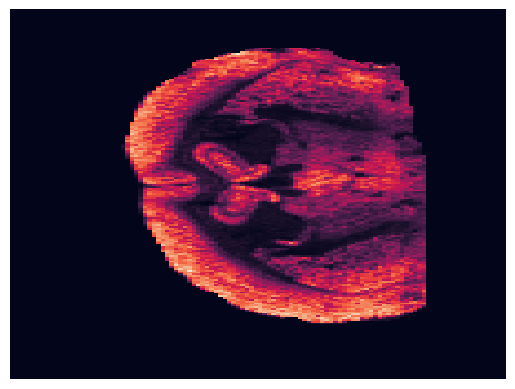

In [65]:
uniform_data_249_4_Tg_s1_835_5336 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('835.5336')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_835_5336, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group4_representative_image.tiff')
plt.show()

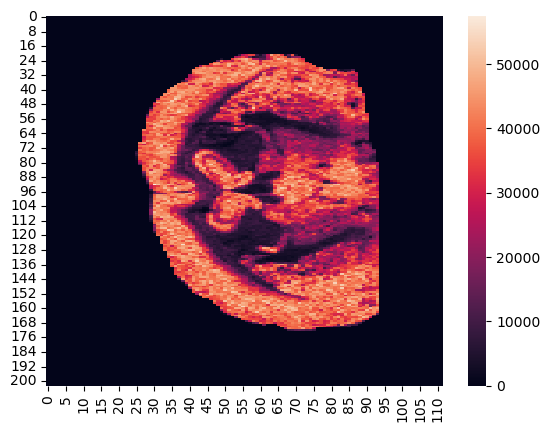

In [77]:
uniform_data_249_4_Tg_s1_834_5289 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('834.5289')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_834_5289)
plt.show()

In [118]:
group6 = filtered_ions_matrix_no_background_tranposed[filtered_ions_matrix_no_background_tranposed['labels'] == 6]
group6.index.tolist()

['303.2291', '303.2302', '303.2328']

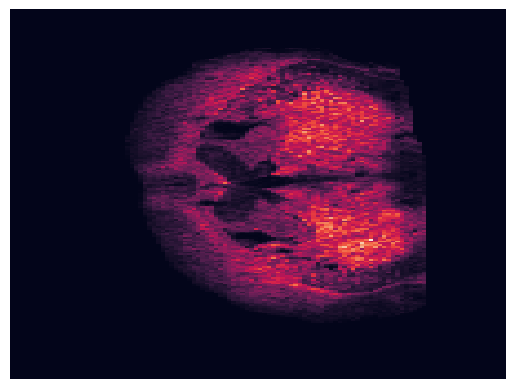

In [71]:
uniform_data_249_4_Tg_s1_673_4694 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('673.4694')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_673_4694, cbar=False)
plt.xticks([], [])
plt.yticks([], [])
plt.savefig('Images For Paper/Negative Ion Patterns/negative_tg_22mo_group2_representative_image.tiff')
plt.show()

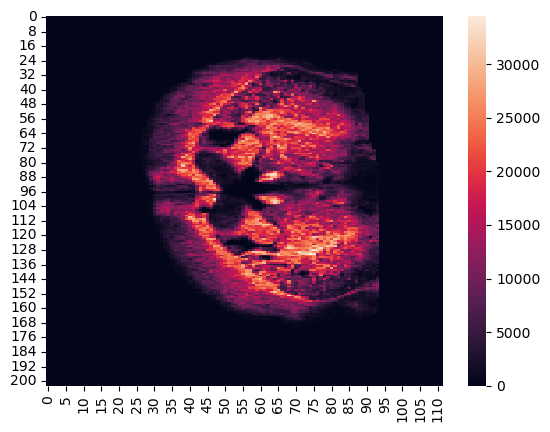

In [80]:
uniform_data_249_4_Tg_s1_889_6260 = np.array(masked_metabolomics_matrix_249_4_Tg_s1).T.reshape([num_metabolites_negative, len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['x_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][0]]), len(coordinates_matrix_249_4_Tg_s1[coordinates_matrix_249_4_Tg_s1['y_coord'] == coordinates_matrix_249_4_Tg_s1.iloc[0][1]])])[masked_metabolomics_matrix_249_4_Tg_s1.columns.get_loc('889.6260')]
ax = sns.heatmap(uniform_data_249_4_Tg_s1_889_6260)
plt.show()

Below we create a dataframe for and save the ion clusters.

In [119]:
ion_clusters_tg_22mo = pd.DataFrame({'Group0': pd.Series(group0.index.tolist()), 'Group1': pd.Series(group1.index.tolist()), 
                                    'Group2': pd.Series(group2.index.tolist()), 'Group3': pd.Series(group3.index.tolist()),
                                   'Group4': pd.Series(group4.index.tolist()), 'Group5': pd.Series(group5.index.tolist()),
                                   'Group6': pd.Series(group6.index.tolist())})
ion_clusters_tg_22mo.to_csv('D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/22mo_tg_ion_pattern_clusters.csv', index = False)
ion_clusters_tg_22mo

Group0    Group1    Group2    Group3    Group4    Group5    Group6
0    700.5101  790.5429  673.4694  283.2645  835.5336  888.6245  303.2291
1    331.2639  255.2333  889.6260  886.5555  885.5513  888.6234  303.2302
2    892.6272  702.5150  788.5448  327.2236  834.5289       NaN  303.2328
3    750.5383  883.5342  723.4990  327.2137  834.5315       NaN       NaN
4    683.5000  174.0408  723.4972  886.5565  834.5302       NaN       NaN
..        ...       ...       ...       ...       ...       ...       ...
261  727.5385       NaN       NaN       NaN       NaN       NaN       NaN
262  754.5710       NaN       NaN       NaN       NaN       NaN       NaN
263  749.4791       NaN       NaN       NaN       NaN       NaN       NaN
264  725.5073       NaN       NaN       NaN       NaN       NaN       NaN
265  878.6012       NaN       NaN       NaN       NaN       NaN       NaN

[266 rows x 7 columns]

# Combine data into one Excel worksheet

In [120]:
with pd.ExcelWriter("D:/NEW All AGE Negative masks and roi sums/Whole Brains/Ion Pattern Clusters/NEW_AGE_negative_ion_pattern_clusters.xlsx") as writer:
    ion_clusters_tg_6mo.to_excel(writer, sheet_name="tg_6mo_groups", index=False)
    ion_clusters_tg_12mo.to_excel(writer, sheet_name="tg_12mo_groups", index=False)
    ion_clusters_tg_22mo.to_excel(writer, sheet_name="tg_22mo_groups", index=False)
    ion_clusters_wt_6mo.to_excel(writer, sheet_name="wt_6mo_groups", index=False)
    ion_clusters_wt_12mo.to_excel(writer, sheet_name="wt_12mo_groups", index=False)
    ion_clusters_wt_22mo.to_excel(writer, sheet_name="wt_22mo_groups", index=False)